# Importing Libraries And Dataset

In [3]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Importing ola booking dataset

df = pd.read_csv(r'C:\Users\disha\Downloads\All Projects\End To End Projects\Ola Project\Uncleaned_Dataset.csv')

# Data Cleaning

In [5]:
# Display top 5 rows

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,NaN,0,NaN,0,NaN,362.18,15.3,2.3,4.3
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,NaN,0,NaN,0,NaN,87.38,20.06,3.7,1.0
2,2024-09-25 18:36:22,01:00,CNR7109492260,Cancelled by Driver,CUST9431,Prime Sedan,Location 10,Location 12,NaN,NaN,0,NaN,1,The customer was coughing/sick,0,NaN,NaN,NaN,NaN,NaN
3,2024-08-01 18:36:22,06:35,CNR3707797042,Success,CUST9369,Prime SUV,Location 28,Location 8,3.16,7.84,0,NaN,0,NaN,0,NaN,185.91,17.11,1.8,4.9
4,2024-12-20 18:36:22,11:59,CNR6385277914,Success,CUST3359,Prime Sedan,Location 3,Location 15,14.83,13.58,0,NaN,0,NaN,0,NaN,171.60,7.31,1.2,1.4


In [6]:
# Dimension of dataset

df.shape

(121728, 20)

In [7]:
# Summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121728 entries, 0 to 121727
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               121728 non-null  object 
 1   Time                               121728 non-null  object 
 2   Booking ID                         121728 non-null  object 
 3   Booking Status                     121728 non-null  object 
 4   Customer ID                        121728 non-null  object 
 5   Vehicle Type                       121728 non-null  object 
 6   Pickup Location                    121728 non-null  object 
 7   Drop Location                      121728 non-null  object 
 8   Avg VTAT                           75695 non-null   float64
 9   Avg CTAT                           75695 non-null   float64
 10  Cancelled Rides by Customer        121728 non-null  int64  
 11  Reason for cancelling by Customer  8478

In [8]:
# Changing data types 

df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Ride Distance'] = pd.to_numeric(df['Ride Distance'],errors = 'coerce')

In [10]:
# Summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121728 entries, 0 to 121727
Data columns (total 20 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Date                               121728 non-null  datetime64[ns]
 1   Time                               121728 non-null  object        
 2   Booking ID                         121728 non-null  object        
 3   Booking Status                     121728 non-null  object        
 4   Customer ID                        121728 non-null  object        
 5   Vehicle Type                       121728 non-null  object        
 6   Pickup Location                    121728 non-null  object        
 7   Drop Location                      121728 non-null  object        
 8   Avg VTAT                           75695 non-null   float64       
 9   Avg CTAT                           75695 non-null   float64       
 10  Cancelled Rides by C

In [11]:
# Checking No. unique values

df.describe(include = 'object')

,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Reason for cancelling by Customer,Reason for cancelling by Driver,Incomplete Rides Reason
count,121728,121728,121728,121728,121728,121728,121728,8478,22005,15550
unique,1440,120509,4,9000,7,50,50,5,4,3
top,13:43,CNR5710758096,Success,CUST1175,Prime Plus,Location 45,Location 31,Change of plans,More than permitted people in there,Customer Demand
freq,118,2,75695,27,17488,2546,2561,1744,5532,5202


In [12]:
# Checking duplicates

df.duplicated().sum()

1193

In [13]:
# Dropping duplicate values

df = df.drop_duplicates()

In [14]:
# Dimension of dataset

df.shape

(120535, 20)

In [15]:
# Checking Null values

df.isnull().sum()

Date                                      0
Time                                      0
Booking ID                                0
Booking Status                            0
Customer ID                               0
Vehicle Type                              0
Pickup Location                           0
Drop Location                             0
Avg VTAT                              45595
Avg CTAT                              45595
Cancelled Rides by Customer               0
Reason for cancelling by Customer    112147
Cancelled Rides by Driver                 0
Reason for cancelling by Driver       98736
Incomplete Rides                          0
Incomplete Rides Reason              105127
Booking Value                         45942
Ride Distance                         45934
Driver Ratings                        45595
Customer Rating                       45595
dtype: int64

In [16]:
# Filling null values in VTAT and CTAT columns

df['Avg VTAT'] = df['Avg VTAT'].fillna(0)
df['Avg CTAT'] = df['Avg CTAT'].fillna(0)

In [17]:
# Filling Reason for Cancelled Rides by Customer column with proper value

df['Reason for cancelling by Customer'] = df['Reason for cancelling by Customer'].fillna('Not Cancelled By Customer')

In [18]:
# Filling Reason for Cancelled Rides by Drivers column with proper value

df['Reason for cancelling by Driver'] = df['Reason for cancelling by Driver'].fillna('Not Cancelled By Driver')

In [19]:
# Filling Incomplete Rides Reasons column with proper value

df['Incomplete Rides Reason'] = df['Incomplete Rides Reason'].fillna('Either Cancelled Or Success Ride')

In [20]:
# Filling null values with o in Booking columns ( as either the rides were cancelled or incomplete )

df['Booking Value'] = df['Booking Value'].fillna(0)

In [21]:
# Filling null values with o in Ride Distance  columns ( as either the rides were cancelled or incomplete )

df['Ride Distance'] = df['Ride Distance'].fillna(0)

In [22]:
# Filling Reason for Driver Ratings  column with proper value

df['Driver Ratings'] = df['Driver Ratings'].fillna('No Rating were Given')

In [23]:
# Filling Reason for Customer Rating  column with proper value

df['Customer Rating'] = df['Customer Rating'].fillna('No Rating were Given')

In [24]:
# Final Null values analyses

df.isnull().sum()

Date                                 0
Time                                 0
Booking ID                           0
Booking Status                       0
Customer ID                          0
Vehicle Type                         0
Pickup Location                      0
Drop Location                        0
Avg VTAT                             0
Avg CTAT                             0
Cancelled Rides by Customer          0
Reason for cancelling by Customer    0
Cancelled Rides by Driver            0
Reason for cancelling by Driver      0
Incomplete Rides                     0
Incomplete Rides Reason              0
Booking Value                        0
Ride Distance                        0
Driver Ratings                       0
Customer Rating                      0
dtype: int64

In [25]:
# Checking outlier

df.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance
count,120535,120535.000000,120535.000000,120535.000000,120535.000000,120535.000000,120535.000000,120535.000000
mean,2024-10-20 18:46:12.646700544,4.976369,4.976853,0.069590,0.180852,0.127830,267.865538,9.600141
min,2024-07-22 18:36:22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-09-05 18:36:22,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2024-10-20 18:36:22,3.750000,3.750000,0.000000,0.000000,0.000000,173.230000,6.580000
75%,2024-12-04 18:36:22,9.360000,9.390000,0.000000,0.000000,0.000000,434.015000,18.300000
max,2025-01-18 18:36:22,15.000000,15.000000,1.000000,1.000000,1.000000,1999.010000,30.000000
std,NaN,5.024405,5.019669,0.254455,0.384897,0.333902,314.232107,10.001738


# EDA ( Exploratory Data Analysis ) On Ola

In [26]:
# Clean data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0


## Question 1 : Which hours of the day have the highest ride cancellations by customers?

In [27]:
# New Column for hour

df['Hours'] = df['Time'].str[:2]

In [28]:
# Records of cancelled rides by customer

df[df['Booking Status'] == 'Cancelled by Customer']

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours
11,2024-09-24 18:36:22,19:26,CNR6345546831,Cancelled by Customer,CUST4507,Prime Sedan,Location 17,Location 30,0.0,0.0,...,AC is not working (Only for 4-wheelers),0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,19
35,2024-09-24 18:36:22,18:43,CNR6309838137,Cancelled by Customer,CUST8239,eBike,Location 20,Location 25,0.0,0.0,...,Change of plans,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,18
42,2024-12-23 18:36:22,16:38,CNR8661974260,Cancelled by Customer,CUST1643,Prime SUV,Location 15,Location 8,0.0,0.0,...,Change of plans,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,16
83,2024-08-14 18:36:22,03:50,CNR7764953986,Cancelled by Customer,CUST6067,eBike,Location 50,Location 7,0.0,0.0,...,Change of plans,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,03
102,2024-10-05 18:36:22,03:16,CNR9979761976,Cancelled by Customer,CUST8632,Prime Plus,Location 36,Location 28,0.0,0.0,...,Driver is not moving towards pickup location,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120455,2024-11-05 18:36:22,11:02,CNR8489402179,Cancelled by Customer,CUST9809,Auto,Location 38,Location 4,0.0,0.0,...,AC is not working (Only for 4-wheelers),0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,11
120465,2024-12-13 18:36:22,10:25,CNR1424112076,Cancelled by Customer,CUST2969,Mini,Location 14,Location 8,0.0,0.0,...,Driver asked to cancel,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,10
120485,2024-12-03 18:36:22,05:25,CNR9711650011,Cancelled by Customer,CUST9423,eBike,Location 27,Location 41,0.0,0.0,...,Driver is not moving towards pickup location,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,05
120499,2024-11-02 18:36:22,19:46,CNR3753927204,Cancelled by Customer,CUST2731,Prime Plus,Location 32,Location 7,0.0,0.0,...,Change of plans,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,19


In [29]:
# Hours of the day with highest ride cancellations by customers

df[df['Booking Status'] == 'Cancelled by Customer'].groupby(['Hours']).size().sort_values(ascending = False)

Hours
09    376
20    370
04    363
07    363
00    362
17    362
01    361
08    361
02    357
06    356
16    355
03    351
12    350
13    348
22    348
19    347
15    344
21    342
05    338
23    336
10    330
11    329
18    326
14    313
dtype: int64

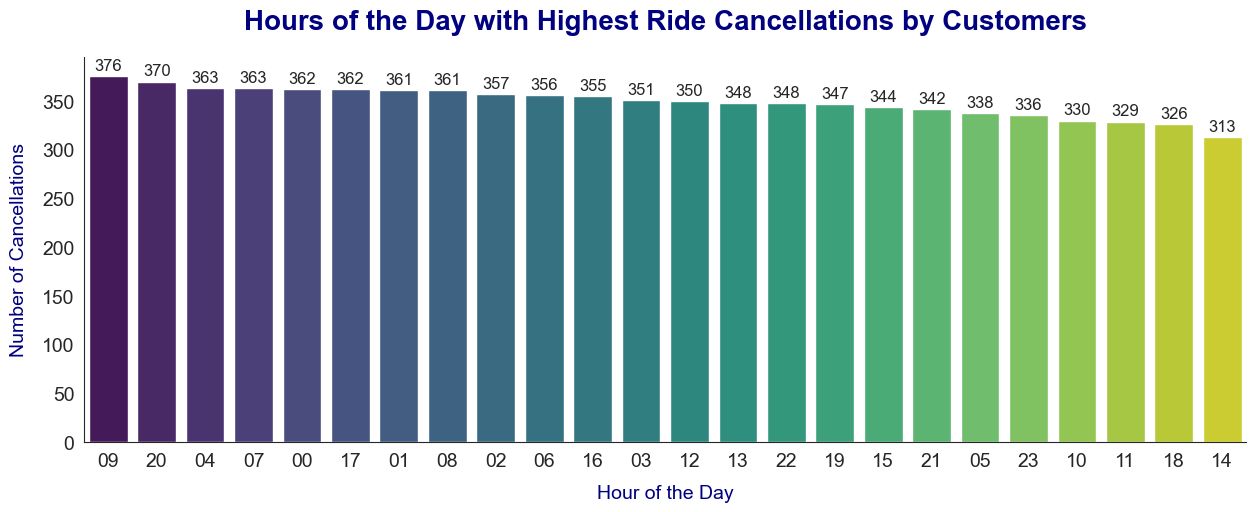

In [30]:
# Visulization of Hours of the day with highest ride cancellations by customers

cancellation_by_hour = df[df['Booking Status'] == 'Cancelled by Customer'].groupby(['Hours']).size().sort_values(ascending = False).reset_index(name ='Count')

sns.set_style("white")


plt.figure(figsize=(15, 5))
ax = sns.barplot(x = 'Hours', y = 'Count', data = cancellation_by_hour, hue = 'Hours',palette ='viridis',legend = False)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=2)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

plt.title('Hours of the Day with Highest Ride Cancellations by Customers',fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Hour of the Day',fontsize=14, color='navy',labelpad = 10)
plt.ylabel('Number of Cancellations',fontsize=14, color='navy',labelpad = 10)
plt.show()

In [31]:
# Findings

# 9 AM has the highest number of cancellations (376), followed by 8 PM (370) and 4 AM (363).
# Early morning hours (e.g., 4 AM, 7 AM, and 8 AM) and late evening hours (e.g., 8 PM) also exhibit significant cancellations.

# High cancellations around 7–9 AM may reflect last-minute changes in plans or delays in commute schedules.

# Elevated cancellations during evening hours (e.g., 8 PM) could be due to shifts in social plans or fatigue after work.

# Early Morning (4 AM) Cancellations at this time might indicate disruptions in planned trips, such as flights or early commutes.

# Identify reasons behind peak-hour cancellations (e.g., driver unavailability, late arrivals, or changed customer preferences).
    
# Optimize resource allocation during high-cancellation windows to reduce the impact on operations.

## Question 2 : What is the relationship between VTAT/CTAT and customer ratings?

In [32]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,...,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,...,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18


In [33]:
# Records of VTAT/CTAT and customer ratings

# Filter out rows where 'Avg VTAT' is 0
df_filtered = df[df['Avg VTAT'] != 0].copy()

# Changing datatype of customer ratings temporary
df_filtered['Customer Rating'] = pd.to_numeric(df_filtered['Customer Rating'], errors='coerce')
df_filtered['Avg VTAT'] = pd.to_numeric(df_filtered['Avg VTAT'], errors='coerce')
df_filtered['Avg CTAT'] = pd.to_numeric(df_filtered['Avg CTAT'], errors='coerce')

df_filtered[['Avg VTAT', 'Avg CTAT', 'Customer Rating']]

,Avg VTAT,Avg CTAT,Customer Rating
0,6.02,14.37,4.3
1,4.74,2.32,1.0
3,3.16,7.84,4.9
4,14.83,13.58,1.4
5,13.70,2.78,2.7
...,...,...,...
121193,10.56,7.10,2.8
121399,13.10,13.66,1.5
121439,14.27,11.16,1.7
121512,6.10,6.91,5.0


In [34]:
# Summaaary of DataFrame 

df_filtered.describe()

,Date,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Customer Rating
count,74940,74940.000000,74940.000000,74940.0,74940.0,74940.0,74940.000000,74940.000000,74940.000000
mean,2024-10-20 23:12:28.341073408,8.004092,8.004870,0.0,0.0,0.0,430.840308,15.441060,3.004174
min,2024-07-22 18:36:22,1.000000,1.000000,0.0,0.0,0.0,0.000000,0.000000,1.000000
25%,2024-09-05 18:36:22,4.500000,4.520000,0.0,0.0,0.0,208.710000,8.220000,2.000000
50%,2024-10-20 18:36:22,8.000000,8.000000,0.0,0.0,0.0,369.620000,15.450000,3.000000
75%,2024-12-04 18:36:22,11.500000,11.490000,0.0,0.0,0.0,589.580000,22.690000,4.000000
max,2025-01-18 18:36:22,15.000000,15.000000,0.0,0.0,0.0,1999.010000,30.000000,5.000000
std,NaN,4.045950,4.035899,0.0,0.0,0.0,297.661024,8.408779,1.152421


In [35]:
# Correlations between VTAT, CTAT, and Customer Ratings:

filter_cor = df_filtered[['Avg VTAT', 'Avg CTAT', 'Customer Rating']].corr()
filter_cor

,Avg VTAT,Avg CTAT,Customer Rating
Avg VTAT,1.000000,0.002189,0.002129
Avg CTAT,0.002189,1.000000,-0.000140
Customer Rating,0.002129,-0.000140,1.000000


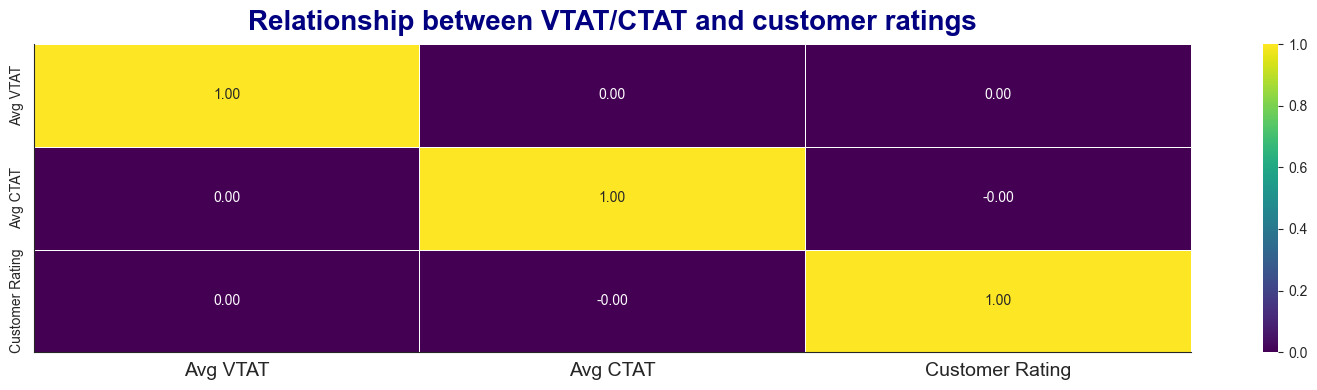

In [36]:
# Visualization of correlation using a heatmap

sns.set_style("white")

plt.figure(figsize=(15, 4))
ax = sns.heatmap(filter_cor, annot=True,cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title('Relationship between VTAT/CTAT and customer ratings', fontsize=20, fontweight='bold', color='navy', pad=10)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=10) 

plt.tight_layout()
plt.show()

# The correlation values are very close to zero, suggesting that there is no significant linear relationship between VTAT, CTAT, and Customer Rating.

In [37]:
# Findings

# The correlation coefficients between Avg VTAT (Vehicle Time at Arrival Time), Avg CTAT (Customer Time at Arrival Time), and Customer Ratings 
# are close to zero.
# Avg VTAT and Customer Ratings: 0.002129
# Avg CTAT and Customer Ratings: -0.000140

# Customer ratings are not significantly influenced by VTAT or CTAT.
# This suggests that customers may prioritize other factors, such as driver behavior, vehicle condition, or the overall experience, over wait times.

# VTAT and CTAT are operational metrics that might not have a direct relationship with subjective customer feedback like ratings.

# While VTAT and CTAT do not strongly correlate with ratings, reducing wait times could still improve customer satisfaction indirectly by minimizing 
# complaints or cancellations.

## Question 3 : How does demand vary by day of the week?

In [38]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,...,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,...,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18


In [39]:
# Add new column day of the week

df['Day_Name'] = df['Date'].dt.day_name()

In [40]:
# Analyzing data

df.head(1)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,...,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.3,2.3,4.3,04,Sunday


In [41]:
# Demand by day of the week

df.groupby(['Day_Name'])['Booking ID'].count().sort_values(ascending = False)

Day_Name
Friday       17471
Monday       17417
Wednesday    17406
Thursday     17344
Saturday     17274
Tuesday      17001
Sunday       16622
Name: Booking ID, dtype: int64

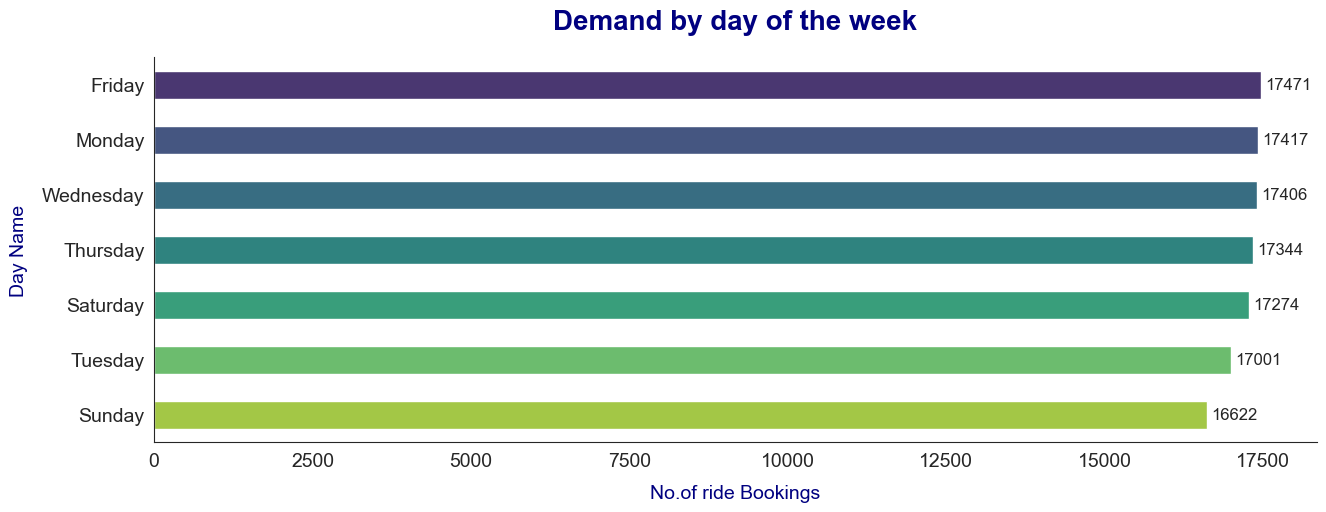

In [42]:
# Visulization of demand by day of the week

demand_day = df.groupby(['Day_Name'])['Booking ID'].count().sort_values(ascending = False).reset_index(name = 'count')

sns.set_style("white")

# bargraph plot
plt.figure(figsize = (15,5))
ax = sns.barplot(data = demand_day, x = 'count', y = 'Day_Name', hue = 'Day_Name', palette = 'viridis',width = 0.5)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fontsize = 12, padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# Add title and labels
plt.title('Demand by day of the week', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('No.of ride Bookings',color='navy',fontsize=14, labelpad=10)
plt.ylabel('Day Name',color='navy',fontsize=14,labelpad=10)
plt.show()

In [43]:
# Findings 

# Friday experiences the highest demand, likely due to increased travel for social or leisure activities.

# Monday to Thursday (17,344–17,471 rides) Demand remains consistently high during the workweek, reflecting commuting or work-related travel patterns.

# Saturday (17,274 rides) Demand drops slightly compared to weekdays, suggesting a shift in purpose from work to leisure or social activities.

# Sunday (16,622 rides) Sunday sees the lowest demand, possibly due to fewer activities or as a rest day for many.

# Despite being a weekday, Tuesday records relatively lower demand compared to other weekdays, potentially due to mid-week work routines stabilizing.

# More vehicles might be needed on Fridays to handle the peak demand, while resources can be reallocated for Sundays.
                                                                                                      
# Offering discounts or incentives on low-demand days like Sunday could encourage more bookings.

## Question 4 : What are the top cancellation reasons given by customers?

In [44]:
# Analyzing data

pd.set_option('display.max_columns', None)
df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday


In [45]:
# Distinct booking status

df['Booking Status'].unique()

array(['Success', 'Cancelled by Driver', 'Cancelled by Customer',
       'Incomplete'], dtype=object)

In [46]:
# Records were customer cancelled the ride

df[df['Booking Status'] == 'Cancelled by Customer']

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
11,2024-09-24 18:36:22,19:26,CNR6345546831,Cancelled by Customer,CUST4507,Prime Sedan,Location 17,Location 30,0.0,0.0,1,AC is not working (Only for 4-wheelers),0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,19,Tuesday
35,2024-09-24 18:36:22,18:43,CNR6309838137,Cancelled by Customer,CUST8239,eBike,Location 20,Location 25,0.0,0.0,1,Change of plans,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,18,Tuesday
42,2024-12-23 18:36:22,16:38,CNR8661974260,Cancelled by Customer,CUST1643,Prime SUV,Location 15,Location 8,0.0,0.0,1,Change of plans,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,16,Monday
83,2024-08-14 18:36:22,03:50,CNR7764953986,Cancelled by Customer,CUST6067,eBike,Location 50,Location 7,0.0,0.0,1,Change of plans,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,03,Wednesday
102,2024-10-05 18:36:22,03:16,CNR9979761976,Cancelled by Customer,CUST8632,Prime Plus,Location 36,Location 28,0.0,0.0,1,Driver is not moving towards pickup location,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,03,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120455,2024-11-05 18:36:22,11:02,CNR8489402179,Cancelled by Customer,CUST9809,Auto,Location 38,Location 4,0.0,0.0,1,AC is not working (Only for 4-wheelers),0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,11,Tuesday
120465,2024-12-13 18:36:22,10:25,CNR1424112076,Cancelled by Customer,CUST2969,Mini,Location 14,Location 8,0.0,0.0,1,Driver asked to cancel,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,10,Friday
120485,2024-12-03 18:36:22,05:25,CNR9711650011,Cancelled by Customer,CUST9423,eBike,Location 27,Location 41,0.0,0.0,1,Driver is not moving towards pickup location,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,05,Tuesday
120499,2024-11-02 18:36:22,19:46,CNR3753927204,Cancelled by Customer,CUST2731,Prime Plus,Location 32,Location 7,0.0,0.0,1,Change of plans,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,19,Saturday


In [47]:
# Top cancellation reasons given by customers

filt_df = df[df['Reason for cancelling by Customer'] != 'Not Cancelled By Customer']
filt_df.groupby(filt_df['Reason for cancelling by Customer'])['Reason for cancelling by Customer'].count().sort_values(ascending = False)

Reason for cancelling by Customer
Change of plans                                 1725
AC is not working (Only for 4-wheelers)         1688
Driver is not moving towards pickup location    1687
Wrong Address                                   1656
Driver asked to cancel                          1632
Name: Reason for cancelling by Customer, dtype: int64

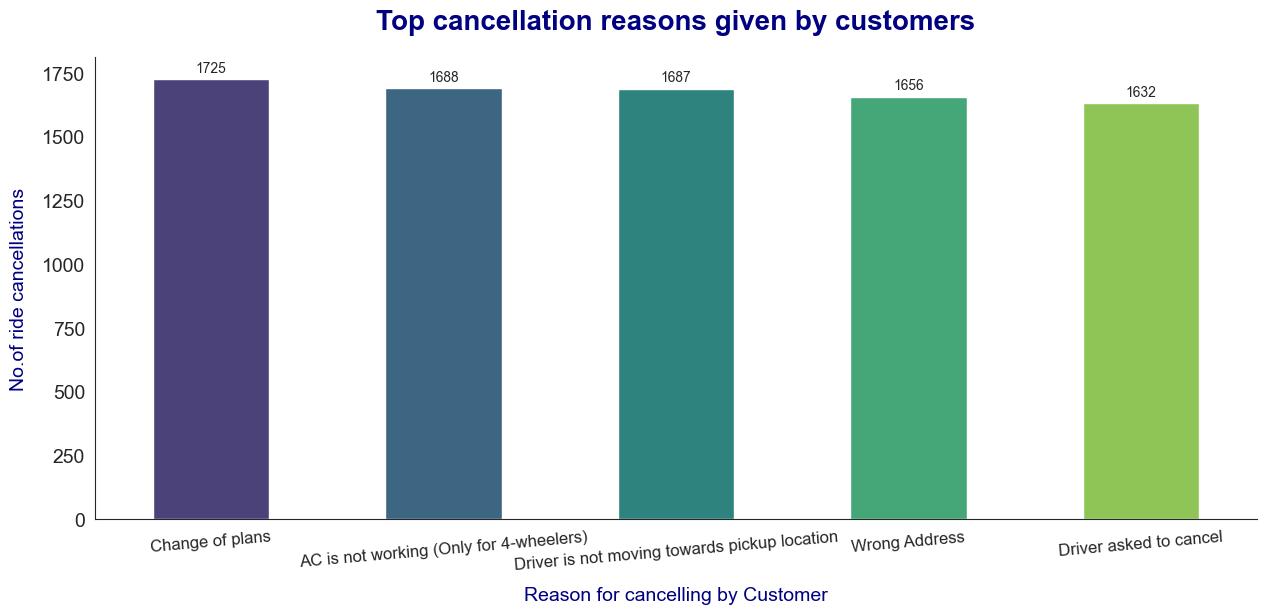

In [48]:
# Visulization of top cancellation reasons given by customers

filt_df = df[df['Reason for cancelling by Customer'] != 'Not Cancelled By Customer']
cancel_reason = filt_df.groupby(filt_df['Reason for cancelling by Customer']).size().sort_values(ascending = False).reset_index(name = 'count')

sns.set_style("white")

# bargraph plot
plt.figure(figsize = (15,6))
ax = sns.barplot(data = cancel_reason, x = 'Reason for cancelling by Customer', y = 'count', hue = 'Reason for cancelling by Customer', palette = 'viridis',width = 0.5)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fontsize = 10, padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# Add title and labels
plt.title('Top cancellation reasons given by customers', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Reason for cancelling by Customer',color='navy',fontsize=14, labelpad=10)
plt.ylabel('No.of ride cancellations',color='navy',fontsize=14,labelpad=10)
plt.xticks(rotation=5, ha='center', fontsize=12)  # Rotate labels 45 degrees
plt.show()

In [49]:
# Findings 

# Change of Plans (1,725 cancellations) is the leading reason, suggesting a high degree of last-minute variability in customer schedules.

# AC is not working (1,688 cancellations) this highlights the importance of vehicle condition, especially for 4-wheelers, in customer satisfaction 
# and retention.

# Driver is not moving towards the pickup location (1,687 cancellations) this indicates customer frustration with perceived delays or lack of 
# responsiveness from drivers.

# Wrong Address (1,656 cancellations) miscommunication or errors in address entry remain a significant problem, calling for improved location 
# input mechanisms.

# Driver Asked to Cancel (1,632 cancellations) this points to instances where drivers indirectly cause cancellations, affecting customer experience.

# Addressing issues like non-functional AC and drivers not moving towards pickups can help reduce cancellations.
    
# Implementing better real-time tracking and accurate location pinning can minimize cancellations due to wrong addresses.

# Encouraging drivers to avoid asking customers to cancel can enhance trust and reliability.

## Question 5 : Which vehicle types are most preferred by customers?

In [50]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday


In [51]:
# Vehicle types most preferred by customers

df.groupby(['Vehicle Type'])['Booking ID'].count().sort_values(ascending = False)

Vehicle Type
Prime Plus     17317
Auto           17312
Mini           17298
Bike           17190
Prime SUV      17163
Prime Sedan    17128
eBike          17127
Name: Booking ID, dtype: int64

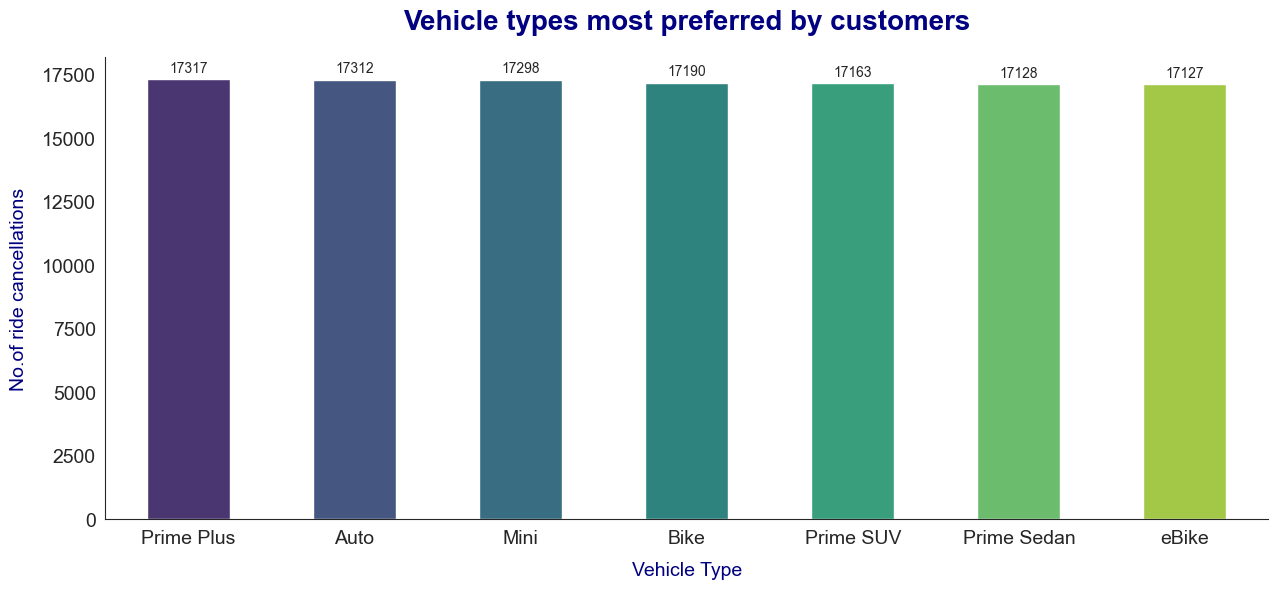

In [52]:
# Visulization of vehicle types most preferred by customers

preferred_customer = df.groupby(['Vehicle Type'])['Booking ID'].count().sort_values(ascending = False).reset_index()

sns.set_style("white")

# bargraph plot
plt.figure(figsize = (15,6))
ax = sns.barplot(data = preferred_customer, x = 'Vehicle Type', y = 'Booking ID', hue = 'Vehicle Type', palette = 'viridis',width = 0.5)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fontsize = 10, padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# Add title and labels
plt.title('Vehicle types most preferred by customers', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Vehicle Type',color='navy',fontsize=14, labelpad=10)
plt.ylabel('No.of ride cancellations',color='navy',fontsize=14,labelpad=10)
plt.show()

In [53]:
# Findings 

# Prime Plus with 17,317 rides, this vehicle type tops the list, indicating its popularity among customers, likely due to comfort, reliability, 
# or additional features.

# Auto close behind with 17,312 rides, suggesting affordability and convenience make it a strong contender for short trips or budget-conscious customers.

# Mini and Bike: Mini (17,298) and Bike (17,190) are similarly popular, showing demand for both small cars and quick, cost-effective bike rides.

# Prime Sedan and eBike: While slightly less popular, Prime Sedan (17,128) and eBike (17,127) still maintain a significant share, reflecting diverse 
# customer preferences for both premium and eco-friendly options.

# The close competition in numbers across vehicle types suggests a diverse customer base with varying preferences for cost, comfort, speed, and 
# environmental consciousness.

# Focus on maintaining high service standards across all categories, especially for Prime Plus and Auto, as they dominate customer choices.

## Question 6 : What are the top cancellation reasons given by drivers?

In [54]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday


In [55]:
# Distinct booking status

df['Booking Status'].unique()

array(['Success', 'Cancelled by Driver', 'Cancelled by Customer',
       'Incomplete'], dtype=object)

In [56]:
# Records were ride is cancelled by driver

df[df['Booking Status'] == 'Cancelled by Driver']

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
2,2024-09-25 18:36:22,01:00,CNR7109492260,Cancelled by Driver,CUST9431,Prime Sedan,Location 10,Location 12,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,01,Wednesday
7,2024-10-26 18:36:22,11:11,CNR7844859156,Cancelled by Driver,CUST9049,Mini,Location 46,Location 21,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,11,Saturday
10,2024-11-17 18:36:22,19:02,CNR7666445232,Cancelled by Driver,CUST3880,Bike,Location 14,Location 4,0.0,0.0,0,Not Cancelled By Customer,1,Customer related issue,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,19,Sunday
12,2024-08-26 18:36:22,02:34,CNR7677622543,Cancelled by Driver,CUST1529,Mini,Location 14,Location 15,0.0,0.0,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,02,Monday
15,2024-09-14 18:36:22,09:16,CNR1669162336,Cancelled by Driver,CUST4403,Auto,Location 17,Location 30,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,09,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120497,2024-09-22 18:36:22,06:33,CNR1018673456,Cancelled by Driver,CUST9928,Prime SUV,Location 50,Location 11,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,06,Sunday
120500,2024-12-05 18:36:22,03:09,CNR5898659333,Cancelled by Driver,CUST1795,eBike,Location 9,Location 28,0.0,0.0,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,03,Thursday
120510,2024-09-28 18:36:22,16:21,CNR3663992649,Cancelled by Driver,CUST8778,Auto,Location 34,Location 30,0.0,0.0,0,Not Cancelled By Customer,1,Personal & Car related issues,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,16,Saturday
120519,2024-12-03 18:36:22,08:33,CNR9131819075,Cancelled by Driver,CUST1759,Prime SUV,Location 38,Location 21,0.0,0.0,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,08,Tuesday


In [57]:
# Top cancellation reasons given by drivers

flt_df = df[df['Reason for cancelling by Driver'] != 'Not Cancelled By Driver']
flt_df.groupby(flt_df['Reason for cancelling by Driver'])['Booking ID'].count().sort_values(ascending = False)

Reason for cancelling by Driver
More than permitted people in there    5487
The customer was coughing/sick         5477
Personal & Car related issues          5433
Customer related issue                 5402
Name: Booking ID, dtype: int64

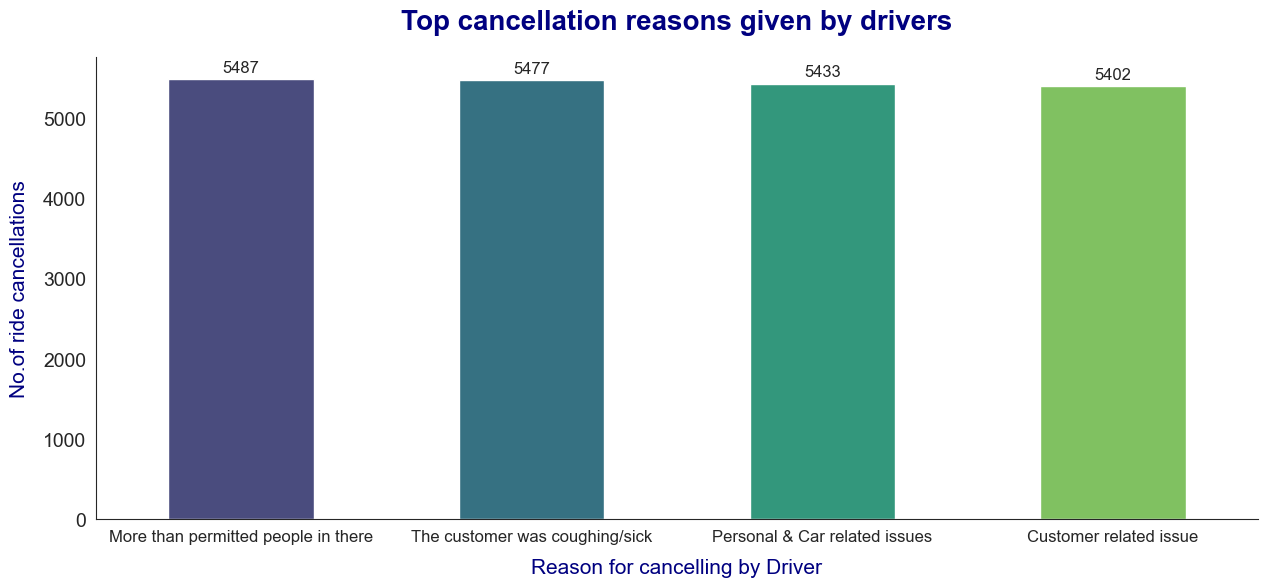

In [58]:
# Visulization of top cancellation reasons given by drivers

flt_df = df[df['Reason for cancelling by Driver'] != 'Not Cancelled By Driver']
cancel_reason = flt_df.groupby(flt_df['Reason for cancelling by Driver'])['Booking ID'].count().sort_values(ascending = False).reset_index()

sns.set_style("white")

# bargraph plot
plt.figure(figsize = (15,6))
ax = sns.barplot(data = cancel_reason, x = 'Reason for cancelling by Driver', y = 'Booking ID', hue = 'Reason for cancelling by Driver', palette = 'viridis',width = 0.5)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fontsize = 12, padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=12)  
ax.tick_params(axis='y', labelsize=14) 

# Add title and labels
plt.title('Top cancellation reasons given by drivers', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Reason for cancelling by Driver',color='navy', fontsize=15, labelpad = 10)
plt.ylabel('No.of ride cancellations',color='navy', fontsize=15, labelpad = 10)
plt.show()

In [59]:
# Findings

# The top reason, cited 5,487 times, indicates cases where customers attempted to book rides with more passengers than allowed.

# A significant number of cancellations (5,477) were due to customers appearing sick or coughing, possibly linked to driver concerns over health safety, 
# particularly post-pandemic.

# Personal or car-related issues (5,433) account for a large proportion, which suggests operational or vehicle maintenance challenges.

# Customer-related issues (5,402) such as delays, misbehavior, or disputes also contributed to cancellations.

# Ensure clear communication regarding passenger limits during booking to minimize confusion and cancellations.

# Provide training and support for drivers in handling health-related concerns effectively. Offering sanitation kits or mandatory masks for customers 
# could help reduce cancellations related to perceived health risks.

# Address operational challenges by offering periodic vehicle inspections and financial assistance for maintenance if needed.


## Question 7 : On which side more cancellations are made customer or driver?

In [60]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday


In [61]:
# Distinct booking status

df['Booking Status'].unique()

array(['Success', 'Cancelled by Driver', 'Cancelled by Customer',
       'Incomplete'], dtype=object)

In [62]:
# Total Cancellation

total_cancellations = df[df['Booking Status'].str.contains('Cancelled')]['Booking ID'].count()
total_cancellations

30187

In [63]:
# No. Of Records where driver cancelled the ride

driver_cancellations = df[df['Booking Status'] == 'Cancelled by Driver']['Booking ID'].count()
driver_cancellations

21799

In [64]:
# No. Of Records where customer cancelled the ride

customer_cancellations = df[df['Booking Status'] ==  'Cancelled by Customer']['Booking ID'].count()
customer_cancellations

8388

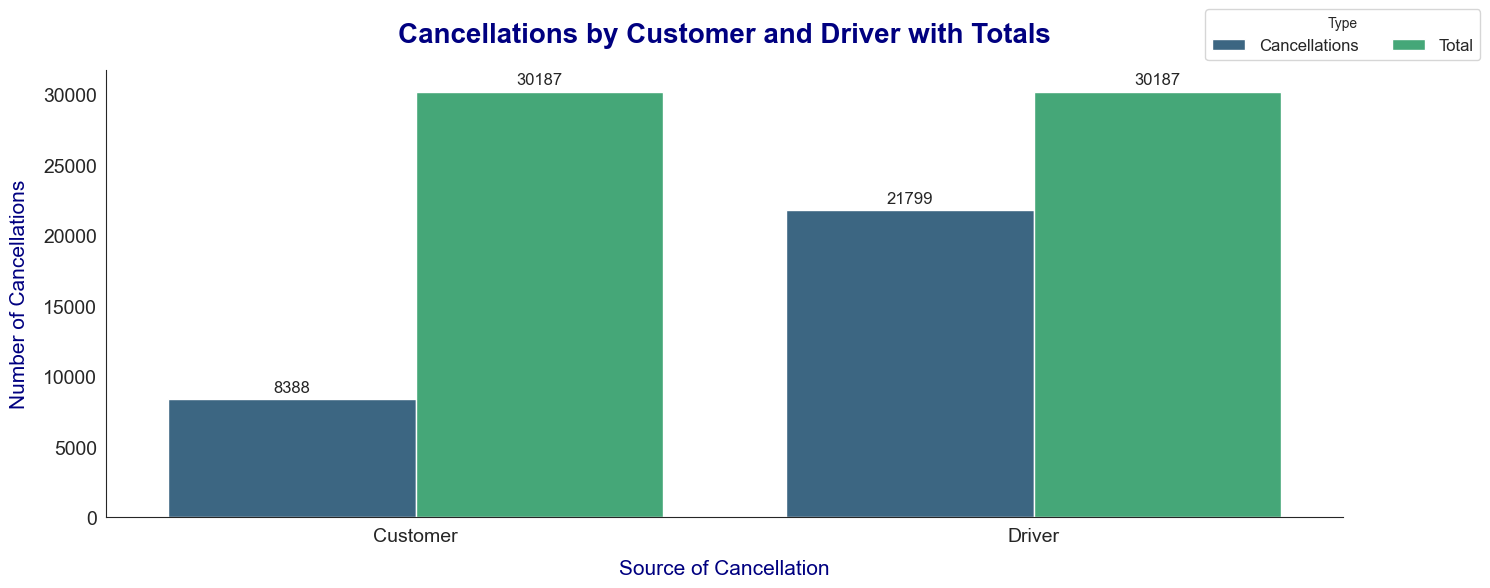

In [65]:
# Data preparation for multiple bar graph
cancelled_data = pd.DataFrame({
    'Source': ['Customer', 'Customer', 'Driver', 'Driver'],
    'Type': ['Cancellations', 'Total', 'Cancellations', 'Total'],
    'Number of Cancellations': [customer_cancellations, total_cancellations,
                                driver_cancellations, total_cancellations]
})

sns.set_style("white")

# Plotting the grouped bar chart
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=cancelled_data, x='Source', y='Number of Cancellations', hue='Type', palette='viridis')

# Add title and labels
plt.title('Cancellations by Customer and Driver with Totals', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Source of Cancellation', fontsize=15,color='navy', labelpad=10)
plt.ylabel('Number of Cancellations', fontsize=15,color='navy', labelpad=10)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', fontsize=12, padding=3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# Adjust legend position
plt.legend(title='Type', loc='center', bbox_to_anchor=(1, 1.08), ncol=2, fontsize=12)

plt.tight_layout()
plt.show()

In [66]:
# Findings 

# Majority of Cancellations are by Drivers

# Driver Cancellations: 21,799 cancellations (72.2% of total).
# Customer Cancellations: 8,388 cancellations (27.8% of total).

# Drivers may cancel due to long wait times, unprofitable ride distances, or inconvenient pickup locations.

# Delays, incorrect ride requests, or lack of communication with customers could also lead to cancellations.

# Customers likely cancel due to delays, change of plans, or dissatisfaction with the assigned vehicle or driver.

# The higher rate of driver cancellations suggests a need to evaluate driver incentives, ride assignment algorithms, and operational logistics 
# to reduce cancellations.
# Customer cancellations might be minimized through improved transparency in estimated time of arrival (ETA) and clear communication during the 
# booking process.


## Question 8 : Are there specific locations where drivers cancel more rides?

In [67]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday


In [68]:
# Records were ride are cancelled by driver

df[df['Booking Status'] == 'Cancelled by Driver']

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
2,2024-09-25 18:36:22,01:00,CNR7109492260,Cancelled by Driver,CUST9431,Prime Sedan,Location 10,Location 12,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,01,Wednesday
7,2024-10-26 18:36:22,11:11,CNR7844859156,Cancelled by Driver,CUST9049,Mini,Location 46,Location 21,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,11,Saturday
10,2024-11-17 18:36:22,19:02,CNR7666445232,Cancelled by Driver,CUST3880,Bike,Location 14,Location 4,0.0,0.0,0,Not Cancelled By Customer,1,Customer related issue,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,19,Sunday
12,2024-08-26 18:36:22,02:34,CNR7677622543,Cancelled by Driver,CUST1529,Mini,Location 14,Location 15,0.0,0.0,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,02,Monday
15,2024-09-14 18:36:22,09:16,CNR1669162336,Cancelled by Driver,CUST4403,Auto,Location 17,Location 30,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,09,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120497,2024-09-22 18:36:22,06:33,CNR1018673456,Cancelled by Driver,CUST9928,Prime SUV,Location 50,Location 11,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,06,Sunday
120500,2024-12-05 18:36:22,03:09,CNR5898659333,Cancelled by Driver,CUST1795,eBike,Location 9,Location 28,0.0,0.0,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,03,Thursday
120510,2024-09-28 18:36:22,16:21,CNR3663992649,Cancelled by Driver,CUST8778,Auto,Location 34,Location 30,0.0,0.0,0,Not Cancelled By Customer,1,Personal & Car related issues,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,16,Saturday
120519,2024-12-03 18:36:22,08:33,CNR9131819075,Cancelled by Driver,CUST1759,Prime SUV,Location 38,Location 21,0.0,0.0,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,08,Tuesday


In [69]:
# Specific locations where drivers cancel more rides

df[df['Booking Status'] == 'Cancelled by Driver'].groupby(['Pickup Location'])['Booking ID'].count().sort_values(ascending = False)

Pickup Location
Location 45    501
Location 11    494
Location 28    482
Location 5     477
Location 32    473
Location 41    470
Location 17    460
Location 16    459
Location 9     457
Location 4     456
Location 15    455
Location 43    455
Location 34    454
Location 49    454
Location 31    449
Location 20    446
Location 14    445
Location 29    443
Location 35    441
Location 12    440
Location 27    439
Location 3     438
Location 7     436
Location 50    433
Location 2     433
Location 30    431
Location 24    431
Location 46    430
Location 19    430
Location 33    429
Location 47    427
Location 6     426
Location 44    426
Location 37    425
Location 42    422
Location 13    421
Location 48    420
Location 23    418
Location 21    417
Location 39    414
Location 18    412
Location 10    412
Location 1     409
Location 25    408
Location 36    407
Location 38    403
Location 22    401
Location 8     399
Location 26    398
Location 40    393
Name: Booking ID, dtype: int64

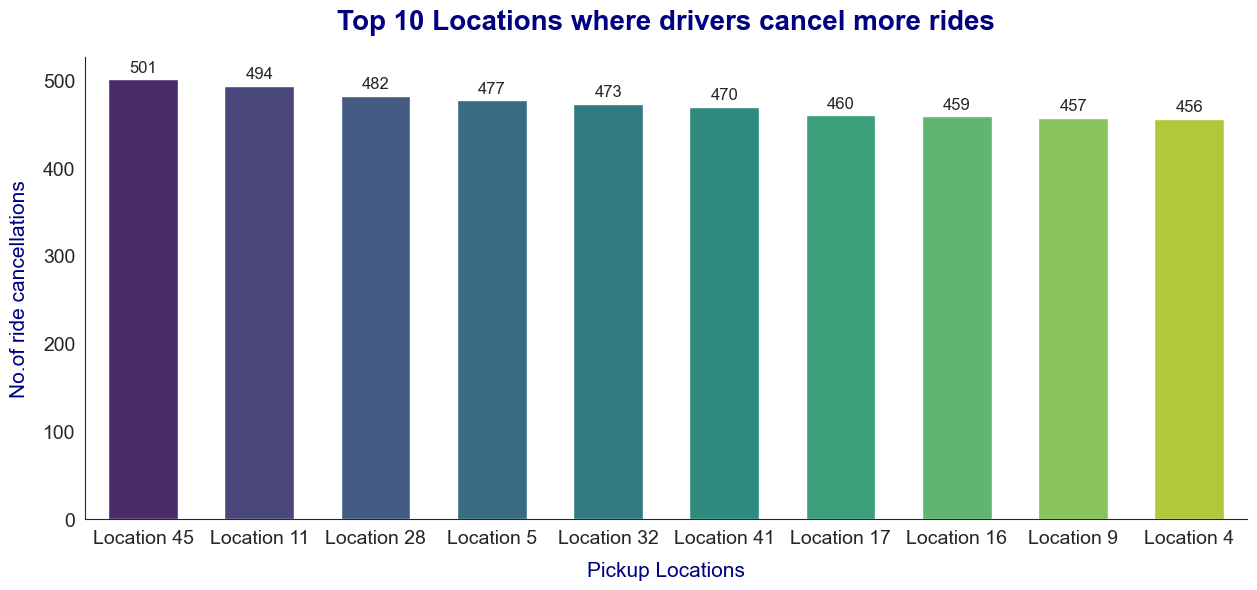

In [70]:
# Visulization of Specific locations where drivers cancel more rides

cancel_location = df[df['Booking Status'] == 'Cancelled by Driver'].groupby(['Pickup Location'])['Booking ID'].count().sort_values(ascending = False).head(10).reset_index()

sns.set_style("white")

# bargraph plot
plt.figure(figsize = (15,6))
ax = sns.barplot(data = cancel_location, x = 'Pickup Location', y = 'Booking ID', hue = 'Pickup Location', palette = 'viridis',width = 0.6)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fontsize = 12, padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# Add title and labels
plt.title('Top 10 Locations where drivers cancel more rides', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Pickup Locations',color='navy',fontsize=15, labelpad=10)
plt.ylabel('No.of ride cancellations',color='navy',fontsize=15, labelpad=10)
plt.show()

In [71]:
# Findings

# Location 45 has the highest number of driver cancellations (501), followed by Location 11 (494) and Location 28 (482).

# These locations consistently rank high in driver cancellations, indicating possible challenges unique to these areas.

# Certain pickup locations may be situated in areas with heavy traffic, making it difficult for drivers to reach on time.

# Drivers may perceive rides from these locations as less profitable due to shorter distances or lower fare expectations.

# Identifying and addressing specific challenges in these high-cancellation locations can improve operational efficiency. 
# This could include better incentives for drivers, educating customers, or operational adjustments such as dynamic pricing.
    
# Further analysis of ride patterns, traffic conditions, and customer behaviors in these locations could provide actionable strategies to reduce 
# cancellations.


## Question 9 : What is the distribution of VTAT and CTAT for successful rides?

In [72]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday


In [73]:
# Records with only sucessful rides

df[df['Booking Status'] == 'Success'] 

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday
3,2024-08-01 18:36:22,06:35,CNR3707797042,Success,CUST9369,Prime SUV,Location 28,Location 8,3.16,7.84,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,185.91,17.11,1.8,4.9,06,Thursday
4,2024-12-20 18:36:22,11:59,CNR6385277914,Success,CUST3359,Prime Sedan,Location 3,Location 15,14.83,13.58,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,171.60,7.31,1.2,1.4,11,Friday
5,2024-12-16 18:36:22,19:51,CNR3135727066,Success,CUST8772,Auto,Location 4,Location 18,13.70,2.78,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,833.77,18.87,2.6,2.7,19,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121193,2024-09-13 18:36:22,11:57,CNR3423991890,Success,CUST7976,Mini,Location 39,Location 27,10.56,7.10,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,844.85,2.17,2.1,2.8,11,Friday
121399,2024-10-02 18:36:22,03:30,CNR3119275864,Success,CUST3009,Prime Sedan,Location 28,Location 33,13.10,13.66,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,233.98,0.00,3.9,1.5,03,Wednesday
121439,2024-12-13 18:36:22,04:02,INVALID7278,Success,CUST1453,eBike,Location 44,Location 5,14.27,11.16,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.00,21.60,2.7,1.7,04,Friday
121512,2024-09-11 18:36:22,08:27,CNR8116949904,Success,CUST6973,Prime Plus,Location 32,Location 20,6.10,6.91,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,600.99,16.98,4.5,5.0,08,Wednesday


In [74]:
# Statistical summary of records with only sucessful rides

df[df['Booking Status'] == 'Success'][['Avg VTAT','Avg CTAT']].describe()

,Avg VTAT,Avg CTAT
count,74940.000000,74940.000000
mean,8.004092,8.004870
std,4.045950,4.035899
min,1.000000,1.000000
25%,4.500000,4.520000
50%,8.000000,8.000000
75%,11.500000,11.490000
max,15.000000,15.000000


In [75]:
# Check distribution is symmetrical or skewed.

skewness_vtat = df[df['Booking Status'] == 'Success']['Avg VTAT'].skew()
skewness_ctat = df[df['Booking Status'] == 'Success']['Avg CTAT'].skew()
print(f"Skewness of VTAT: {skewness_vtat}")
print(f"Skewness of CTAT: {skewness_ctat}") 

# Both VTAT and CTAT have skewness values extremely close to 0.
# This indicates that the distributions are highly symmetrical.

Skewness of VTAT: -0.0001727839534473493
Skewness of CTAT: -0.004137349857826484


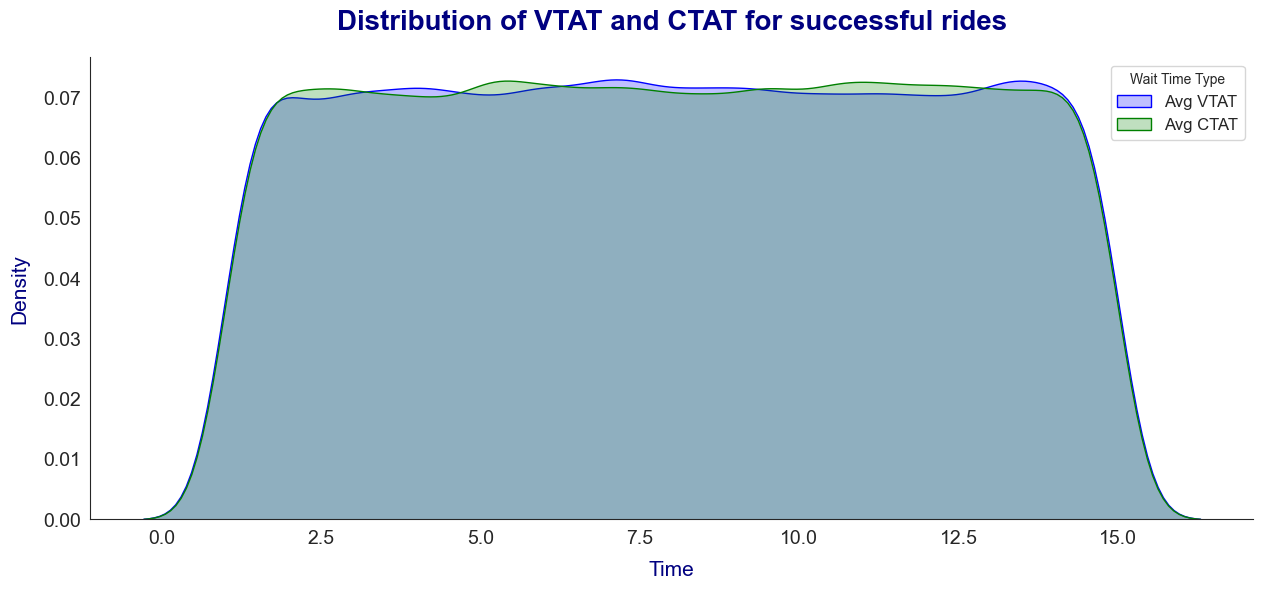

In [76]:
# Visualization of distribution 

success_record = df[df['Booking Status'] == 'Success'] 

sns.set_style("white")

# Plot the distributions
plt.figure(figsize = (15,6))
ax = sns.kdeplot(success_record['Avg VTAT'],label='Avg VTAT', fill=True, color='blue')
ax = sns.kdeplot(success_record['Avg CTAT'],label='Avg CTAT', fill=True, color='green')

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# Add title and labels
plt.title('Distribution of VTAT and CTAT for successful rides', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Time',color='navy',fontsize=15, labelpad=10)
plt.ylabel('Density',color='navy',fontsize=15, labelpad=10)
plt.legend(title='Wait Time Type', fontsize=12)
plt.show()


In [77]:
# Findings

# The VTAT (Vehicle Turnaround Time) distribution is almost symmetrical, with skewness very close to zero. 
# This indicates that the majority of VTAT values are evenly distributed around the mean, with no significant tail on either side.
# This balanced distribution suggests that the vehicle turnaround times are fairly consistent for successful rides.

# Similar to VTAT, the CTAT (Customer Turnaround Time) distribution is also nearly symmetrical, with skewness close to zero.
# This reflects a consistent distribution of customer turnaround times across successful rides, with no extreme delays or short durations 
# significantly affecting the dataset.

# Both VTAT and CTAT distributions being nearly symmetrical indicate operational stability in terms of vehicle availability and customer processing 
# times for successful rides.
# The minimal skewness highlights the absence of significant outliers or anomalies in turnaround times. 

## Question 10 : Which locations have the highest average wait times (VTAT and CTAT)?

In [78]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday


In [79]:
# locations with highest average wait times (VTAT)

df.groupby(['Pickup Location'])['Avg VTAT'].mean().sort_values( ascending = False)

Pickup Location
Location 6     5.305655
Location 48    5.139604
Location 7     5.115445
Location 26    5.102889
Location 33    5.093821
Location 27    5.084122
Location 8     5.080559
Location 37    5.079434
Location 44    5.077948
Location 10    5.071699
Location 22    5.069104
Location 46    5.066682
Location 24    5.066272
Location 19    5.054937
Location 40    5.052583
Location 17    5.039669
Location 1     5.035817
Location 25    5.034367
Location 50    5.029176
Location 29    5.020544
Location 3     5.007203
Location 38    5.005818
Location 15    5.003834
Location 47    5.002382
Location 39    4.987178
Location 12    4.986830
Location 2     4.981597
Location 43    4.964572
Location 35    4.964277
Location 42    4.952807
Location 41    4.943232
Location 13    4.942602
Location 11    4.934313
Location 14    4.909508
Location 23    4.890125
Location 4     4.889693
Location 9     4.889000
Location 34    4.888865
Location 18    4.887909
Location 30    4.884455
Location 16    4.882207


In [80]:
# locations with highest average wait times (CTAT)

df.groupby(['Pickup Location'])['Avg CTAT'].mean().sort_values( ascending = False)

Pickup Location
Location 22    5.152003
Location 48    5.120480
Location 25    5.100682
Location 27    5.093340
Location 39    5.092441
Location 12    5.091029
Location 6     5.089026
Location 26    5.077997
Location 10    5.076241
Location 44    5.075585
Location 19    5.070609
Location 13    5.068245
Location 8     5.067373
Location 38    5.036387
Location 3     5.034852
Location 33    5.034311
Location 30    5.030801
Location 47    5.030418
Location 42    5.024753
Location 15    5.015519
Location 50    5.005960
Location 4     5.005591
Location 18    5.000957
Location 40    5.000728
Location 24    4.997020
Location 17    4.993957
Location 37    4.989963
Location 43    4.985713
Location 14    4.966111
Location 46    4.960943
Location 16    4.960092
Location 1     4.956170
Location 35    4.955946
Location 45    4.953737
Location 23    4.951440
Location 34    4.929177
Location 49    4.928627
Location 9     4.917183
Location 29    4.916238
Location 41    4.910446
Location 7     4.885721


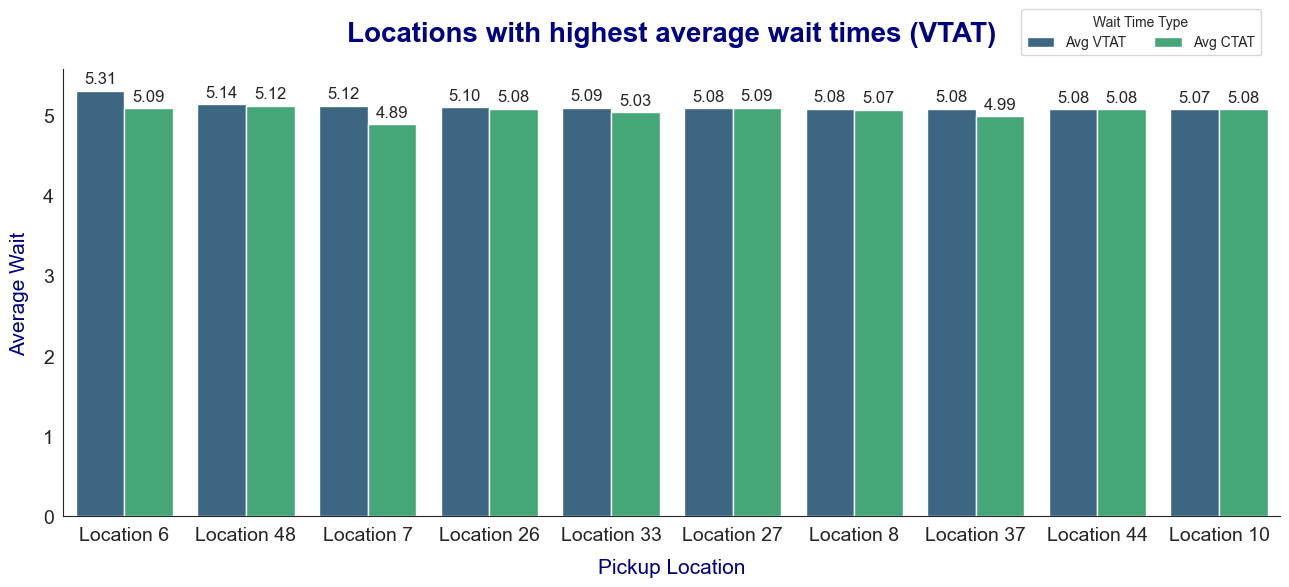

In [81]:
# Visulization of locations with highest average wait times (VTAT/CTAT)

average_wait_time = df.groupby(['Pickup Location'])[['Avg VTAT','Avg CTAT']].mean().sort_values( by = 'Avg VTAT', ascending = False).reset_index()
top_location = average_wait_time.head(10)

# Melt data 
average_wait_time_melted = average_wait_time.melt(id_vars = 'Pickup Location', value_vars = ['Avg VTAT','Avg CTAT'], var_name = 'Wait Time Type', value_name ='Average Time')

# Filter top 10 locations for both VTAT and CTAT
top_wait_time = average_wait_time_melted[average_wait_time_melted['Pickup Location'].isin(top_location['Pickup Location'])]

sns.set_style("white")

# Figure plot
plt.figure(figsize = (13,6))
ax = sns.barplot(data = top_wait_time, x = 'Pickup Location', y = 'Average Time', hue = 'Wait Time Type', palette = 'viridis')

# Add Labels on each bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize = 12,padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# Add title and labels
plt.title('Locations with highest average wait times (VTAT)', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Pickup Location',color='navy',fontsize=15, labelpad=10)
plt.ylabel('Average Wait',color='navy',fontsize=15, labelpad=10)

# Add legend at the top
plt.legend(title='Wait Time Type', loc='upper right', bbox_to_anchor=(0.99, 1.15), ncol=2, fontsize=10)

plt.tight_layout()
plt.show()

In [82]:
# Findings

# Location 6 has the highest VTAT at 5.3057 minutes, indicating possible vehicle shortages or logistical challenges in this area.
    
# Location 48 and Location 7 follow with VTATs of 5.1396 minutes and 5.1154 minutes, respectively.

# Other locations such as Location 26, Location 33, and Location 27 also exhibit consistently high wait times, suggesting inefficiencies in 
# vehicle availability.

# Location 22 tops the list with the highest CTAT of 5.1520 minutes, reflecting customer-related delays or higher demand.

# Location 48 appears in both VTAT and CTAT lists, with a CTAT of 5.1205 minutes, pointing to combined challenges in this location.

# Location 25, Location 27, and Location 39 also show high CTAT values, indicating areas where customers experience longer waiting times.

# Locations 6, 10, 26, 27, 44, and 48 appear in both VTAT and CTAT lists, suggesting these are critical areas that require operational improvements 
# to reduce both vehicle and customer wait times.

# Locations with consistently high VTAT and CTAT require targeted interventions, such as increasing vehicle deployment or optimizing dispatch systems, 
# to improve customer satisfaction and operational efficiency.

## Question 11 : How do cancellation rates differ across weekdays and weekends?

In [83]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday


In [84]:
# Add new column day of the week

df['Day_Name'] = df['Date'].dt.day_name()

In [85]:
# Analyzing data

df.head(1)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.3,2.3,4.3,04,Sunday


In [86]:
# Add new column day_category

df['Day Category'] = df['Day_Name'].apply(lambda x : 'Weekends' if x in ['Saturday','Sunday'] else 'Weekdays')

In [87]:
# Analyzing data

df.head(1)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.3,2.3,4.3,04,Sunday,Weekends


In [88]:
# Records with cancellation

df[df['Booking Status'].str.contains('Cancelled')]

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category
2,2024-09-25 18:36:22,01:00,CNR7109492260,Cancelled by Driver,CUST9431,Prime Sedan,Location 10,Location 12,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,01,Wednesday,Weekdays
7,2024-10-26 18:36:22,11:11,CNR7844859156,Cancelled by Driver,CUST9049,Mini,Location 46,Location 21,0.0,0.0,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,11,Saturday,Weekends
10,2024-11-17 18:36:22,19:02,CNR7666445232,Cancelled by Driver,CUST3880,Bike,Location 14,Location 4,0.0,0.0,0,Not Cancelled By Customer,1,Customer related issue,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,19,Sunday,Weekends
11,2024-09-24 18:36:22,19:26,CNR6345546831,Cancelled by Customer,CUST4507,Prime Sedan,Location 17,Location 30,0.0,0.0,1,AC is not working (Only for 4-wheelers),0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,19,Tuesday,Weekdays
12,2024-08-26 18:36:22,02:34,CNR7677622543,Cancelled by Driver,CUST1529,Mini,Location 14,Location 15,0.0,0.0,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,02,Monday,Weekdays
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120500,2024-12-05 18:36:22,03:09,CNR5898659333,Cancelled by Driver,CUST1795,eBike,Location 9,Location 28,0.0,0.0,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,03,Thursday,Weekdays
120509,2024-09-08 18:36:22,11:17,CNR2096770287,Cancelled by Customer,CUST2200,Auto,Location 37,Location 40,0.0,0.0,1,Driver is not moving towards pickup location,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,11,Sunday,Weekends
120510,2024-09-28 18:36:22,16:21,CNR3663992649,Cancelled by Driver,CUST8778,Auto,Location 34,Location 30,0.0,0.0,0,Not Cancelled By Customer,1,Personal & Car related issues,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,16,Saturday,Weekends
120519,2024-12-03 18:36:22,08:33,CNR9131819075,Cancelled by Driver,CUST1759,Prime SUV,Location 38,Location 21,0.0,0.0,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.0,0.0,No Rating were Given,No Rating were Given,08,Tuesday,Weekdays


In [89]:
# Total bookings

total_rides = df['Booking ID'].count()

In [90]:
# Cancellation across weekdays and weekends

cancel_rides = df[df['Booking Status'].str.contains('Cancelled')].groupby(['Day Category'])['Booking ID'].count()
cancel_rides

Day Category
Weekdays    21664
Weekends     8523
Name: Booking ID, dtype: int64

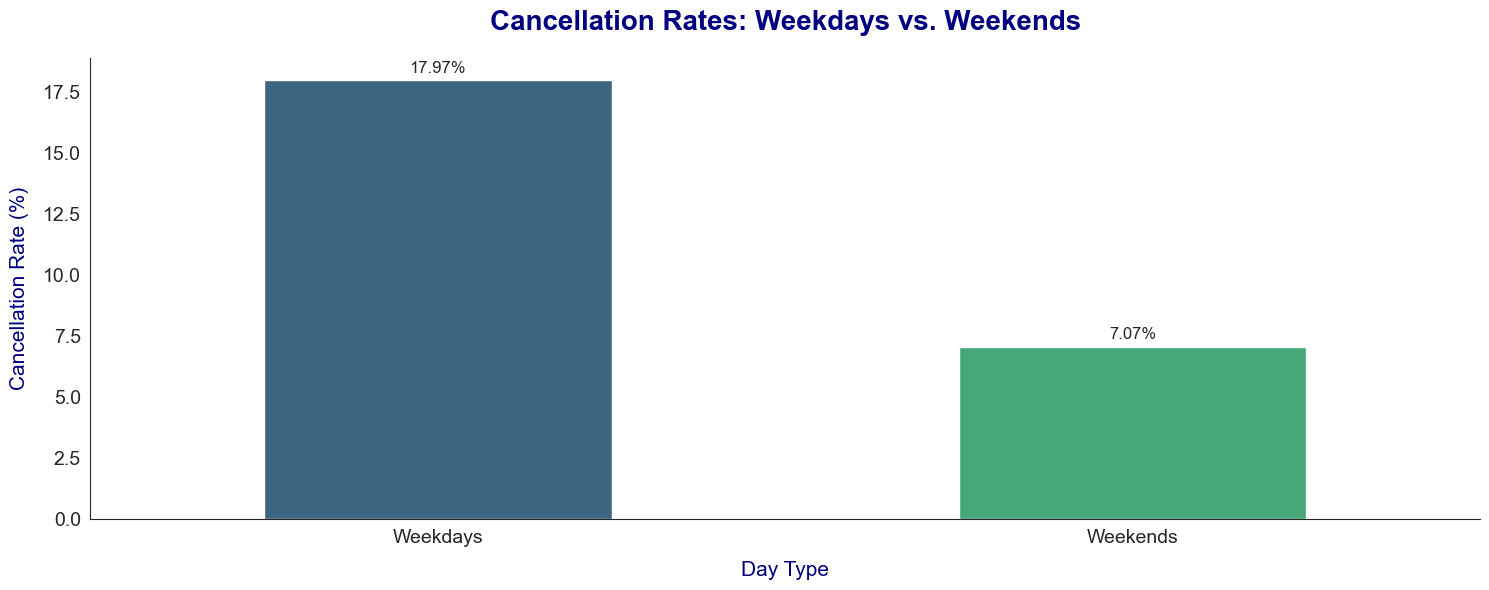

In [91]:
# Visulization of cancellation rates across weekdays and weekends

cancellation_rates = (cancel_rides/total_rides*100).reset_index(name = 'Cancellation Rate')

sns.set_style("white")

# Plot the data
plt.figure(figsize=(15, 6))
ax = sns.barplot(data=cancellation_rates, x = 'Day Category', y ='Cancellation Rate', hue = 'Day Category', palette='viridis',width=0.5)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f%%', fontsize=12,padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# Add title and labels
plt.title('Cancellation Rates: Weekdays vs. Weekends', fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Day Type',color='navy',fontsize=15, labelpad=10)
plt.ylabel('Cancellation Rate (%)',color='navy',fontsize=15, labelpad=10)
plt.tight_layout()
plt.show()

In [92]:
# Findings

# Prime Plus contributes the highest revenue of 4,677,474.28, indicating it is likely popular among customers or has higher fares.

# Auto is the second-highest contributor with 4,641,241.68, highlighting its importance in revenue generation despite being a budget-friendly option.
    
# Prime Sedan and Mini follow closely, contributing revenues of 4,622,444.20 and 4,619,535.54, respectively.
    
# The eBike has the lowest revenue contribution at 4,501,322.34, which could be due to fewer rides, shorter distances, or lower fares.
    
# The revenue distribution suggests that premium vehicles (like Prime Plus and Prime SUV) contribute significantly, but affordable options like 
# Autos and Bikes are essential for maintaining volume and overall revenue.

## Question 12 : What is revenue contribution of each vehicle type?

In [93]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday,Weekends
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays


In [94]:
# Revenue contribution of each vehicle type

df.groupby(['Vehicle Type'])['Booking Value'].sum().sort_values(ascending = False)

Vehicle Type
Prime Plus     4677474.28
Auto           4641241.68
Prime Sedan    4622444.20
Mini           4619535.54
Prime SUV      4616620.80
Bike           4608533.84
eBike          4501322.34
Name: Booking Value, dtype: float64

Text(0.5, 1.0, 'Revenue contribution of each vehicle type')

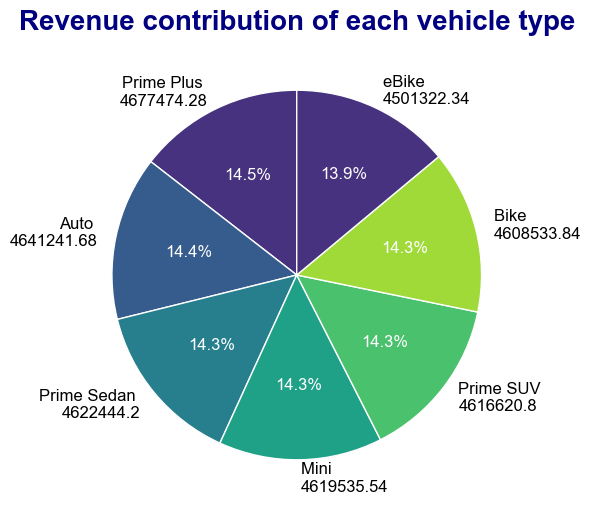

In [95]:
# Visulization of revenue contribution of each vehicle type

revenue_contribute = df.groupby(['Vehicle Type'])['Booking Value'].sum().sort_values(ascending = False)

# define Seaborn color palette to use 
palette_color = sns.color_palette('viridis') 

plt.figure(figsize = (10,6))
wedges, texts, autotexts = plt.pie(revenue_contribute, 
        labels=[f"{label} \n{count}" for label, count in zip(revenue_contribute.index, revenue_contribute.values)], 
        colors = palette_color ,
        autopct='%1.1f%%',  # Display percentages
        startangle=90,      # Start angle for better orientation 
        textprops = {'color': 'white','fontsize': 12},  # Set percentage text color to white
        center=(0, 0) 
)

# Customize label text color (numbers + labels)
for text in texts:
    text.set_color('black')  # Set label text color to black for visibility
    
# Title of the chart
plt.title('Revenue contribution of each vehicle type',fontsize = 20,color= 'navy',fontweight='bold',pad = 10)


In [96]:
# Findings

# Prime Plus contributes the highest revenue of 4,677,474.28, indicating it is likely popular among customers or has higher fares.

# Auto is the second-highest contributor with 4,641,241.68, highlighting its importance in revenue generation despite being a budget-friendly option.
    
# Prime Sedan and Mini follow closely, contributing revenues of 4,622,444.20 and 4,619,535.54, respectively.
    
# The eBike has the lowest revenue contribution at 4,501,322.34, which could be due to fewer rides, shorter distances, or lower fares.
    
# The revenue distribution suggests that premium vehicles (like Prime Plus and Prime SUV) contribute significantly, but affordable options like
# Autos and Bikes are essential for maintaining volume and overall revenue.

## Question 13 : Which dates have the highest ride demand?

In [97]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday,Weekends
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays


In [98]:
# Add new column dates

df['Dates'] = df['Date'].dt.day

In [99]:
# Analyze column

df.head(1)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.3,2.3,4.3,04,Sunday,Weekends,10


In [100]:
# Dates have the highest ride demand

df.groupby(['Dates'])['Booking ID'].count().sort_values(ascending = False)

Dates
16    4100
5     4061
18    4054
29    4042
6     4031
26    4031
8     4026
15    4023
23    4022
27    4018
12    4011
7     4009
24    4009
9     4007
25    3995
2     3994
13    3986
22    3974
14    3973
17    3946
11    3941
3     3939
10    3934
28    3927
30    3923
4     3914
1     3876
21    3358
19    3335
20    3312
31    2764
Name: Booking ID, dtype: int64

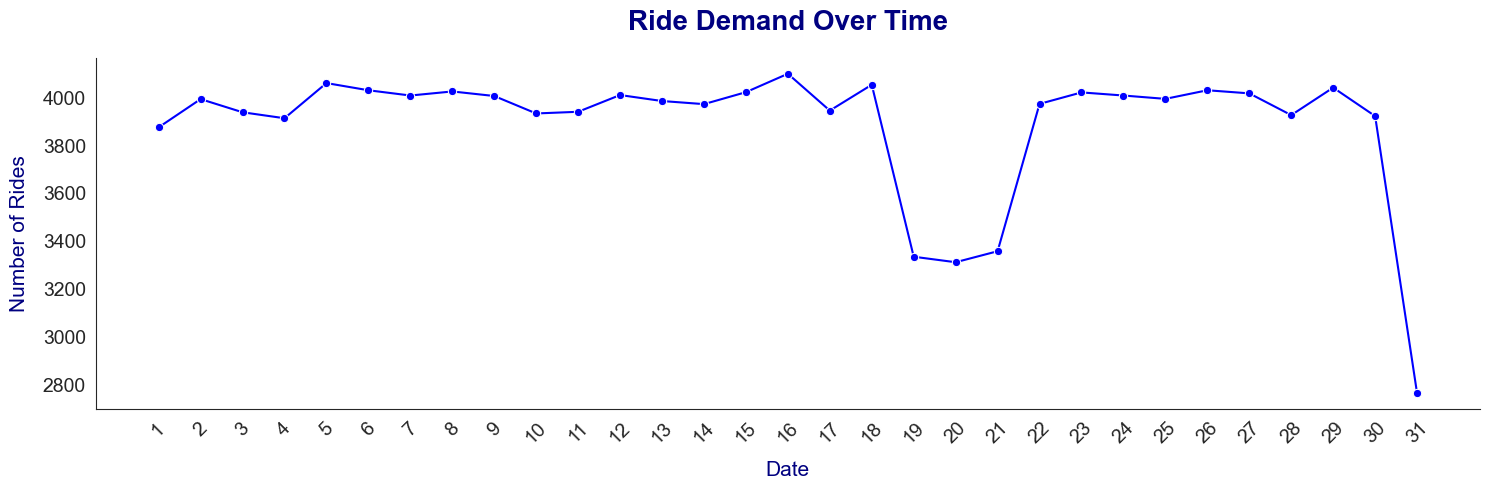

In [101]:
# Visualization of dates have the highest ride demand

dateswise_ride = df.groupby(['Dates'])['Booking ID'].count().reset_index(name = 'count')

sns.set_style("white")

# Graph plot
plt.figure(figsize = (15,5))
ax = sns.lineplot(data = dateswise_ride, x = range(1, len(dateswise_ride) + 1), y = 'count', marker = 'o', color = 'Blue')

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# Add title and label
plt.title('Ride Demand Over Time',fontsize = 20,pad = 20,color= 'navy',fontweight='bold')
plt.xlabel('Date', color='navy',fontsize=15, labelpad=10)
plt.ylabel('Number of Rides', color='navy',fontsize=15, labelpad=10)
plt.xticks(ticks=range(1, len(dateswise_ride) + 1), labels=dateswise_ride['Dates'], rotation=45)
plt.tight_layout()
plt.show()

In [102]:
# Findings

# Date 16 recorded the highest ride demand with 4100 rides, followed by Date 5 with 4061 rides.
    
# Other high-demand dates include Date 18 (4054 rides) and Date 29 (4042 rides).
                                                                  
# Demand appears relatively consistent across most dates in the month, with a gradual decline toward Date 31, which had the lowest demand (2764 rides).
                                                                                                                                         
# Mid-month and end-of-month dates seem to have higher demand, potentially indicating specific patterns tied to events, weekends, or payroll cycles.
    
# Understanding these high-demand dates can help allocate resources effectively, plan promotions, and improve service reliability.

## Question 14 : Are there any pickup locations with consistently high demand?

In [103]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday,Weekends,10
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6


In [104]:
# Pickup locations with consistently high demand

df.groupby(['Pickup Location'])['Booking ID'].count().sort_values(ascending = False)

Pickup Location
Location 11    2527
Location 45    2510
Location 30    2496
Location 28    2496
Location 16    2492
Location 33    2489
Location 50    2475
Location 3     2467
Location 41    2466
Location 35    2462
Location 9     2449
Location 4     2445
Location 6     2444
Location 27    2443
Location 37    2439
Location 15    2439
Location 49    2433
Location 20    2421
Location 43    2419
Location 14    2417
Location 17    2416
Location 10    2413
Location 32    2411
Location 12    2410
Location 13    2410
Location 34    2406
Location 24    2406
Location 42    2405
Location 19    2398
Location 21    2396
Location 31    2395
Location 5     2394
Location 29    2390
Location 39    2388
Location 2     2386
Location 44    2383
Location 1     2381
Location 40    2377
Location 48    2373
Location 47    2368
Location 46    2366
Location 22    2366
Location 8     2360
Location 7     2358
Location 25    2347
Location 26    2347
Location 38    2322
Location 23    2320
Location 18    2319
Loca

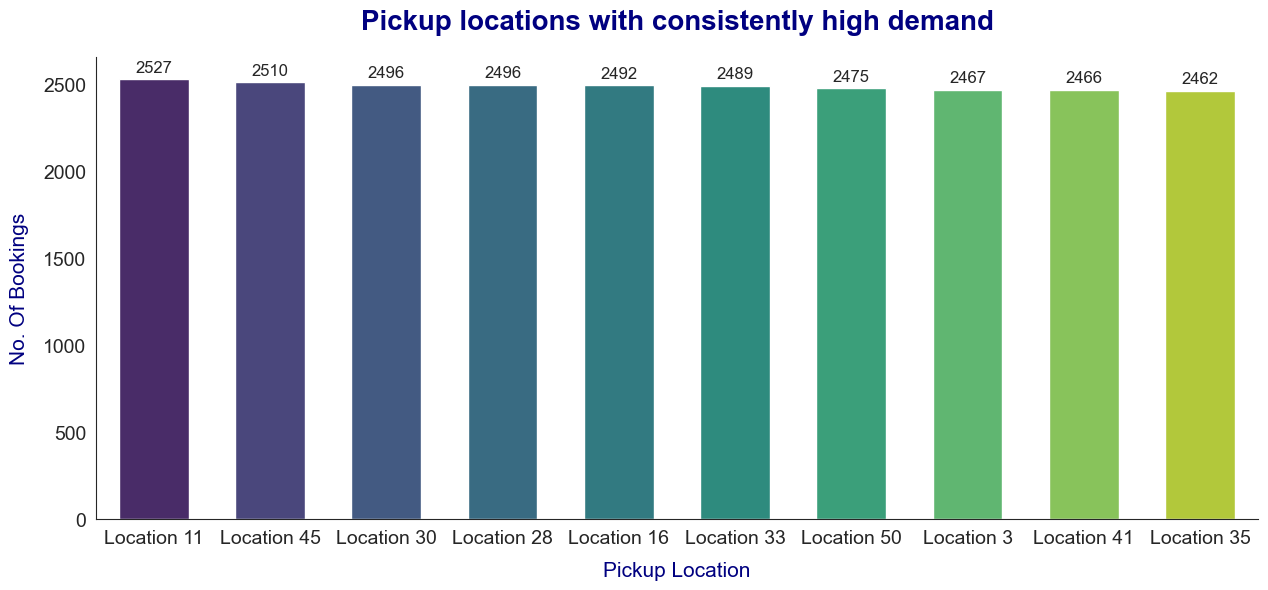

In [105]:
# Visualization of Pickup locations with consistently high demand

pickup_loc = df.groupby(['Pickup Location'])['Booking ID'].count().sort_values(ascending = False).head(10).reset_index(name = 'Count')

sns.set_style("white")

plt.figure(figsize = (15,6))
ax = sns.barplot( x = 'Pickup Location', y = 'Count', data = pickup_loc, hue = 'Pickup Location', palette = 'viridis',legend= False,width = 0.6)

# Add labels to each bar

for container in ax.containers:
    ax.bar_label(container, fontsize = 12,padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

plt.title('Pickup locations with consistently high demand',fontsize = 20,pad = 20,color= 'navy',fontweight='bold')
plt.xlabel('Pickup Location',color='navy',fontsize=15, labelpad=10)
plt.ylabel('No. Of Bookings',color='navy',fontsize=15, labelpad=10)
plt.show()

In [106]:
# Findings

# Location 11 has the highest demand with 2527 rides, followed closely by Location 45 with 2510 rides.
    
# Other consistently high-demand locations include Location 30, Location 28 (2496 rides each), and Location 16 (2492 rides).

# The demand across the top locations is fairly balanced, with only slight variations in ride numbers.
    
# These locations likely serve as key commuting or activity hubs, indicating their importance for operational focus.
    
# High demand in these areas may require strategic vehicle allocation during peak hours to avoid cancellations or delays.

## Question 15 : What is the most popular vehicle type during peak hours?

In [107]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,04,Sunday,Weekends,10
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6


In [108]:
# Hours of the day with highest ride bookings by customers

df.groupby(['Hours'])['Booking ID'].size().sort_values(ascending = False)

Hours
17    5143
18    5124
07    5123
01    5094
04    5086
12    5085
23    5080
21    5063
15    5042
20    5037
00    5035
13    5031
05    5020
03    5008
10    5004
22    4996
11    4983
09    4960
08    4957
06    4954
16    4949
02    4937
19    4935
14    4889
Name: Booking ID, dtype: int64

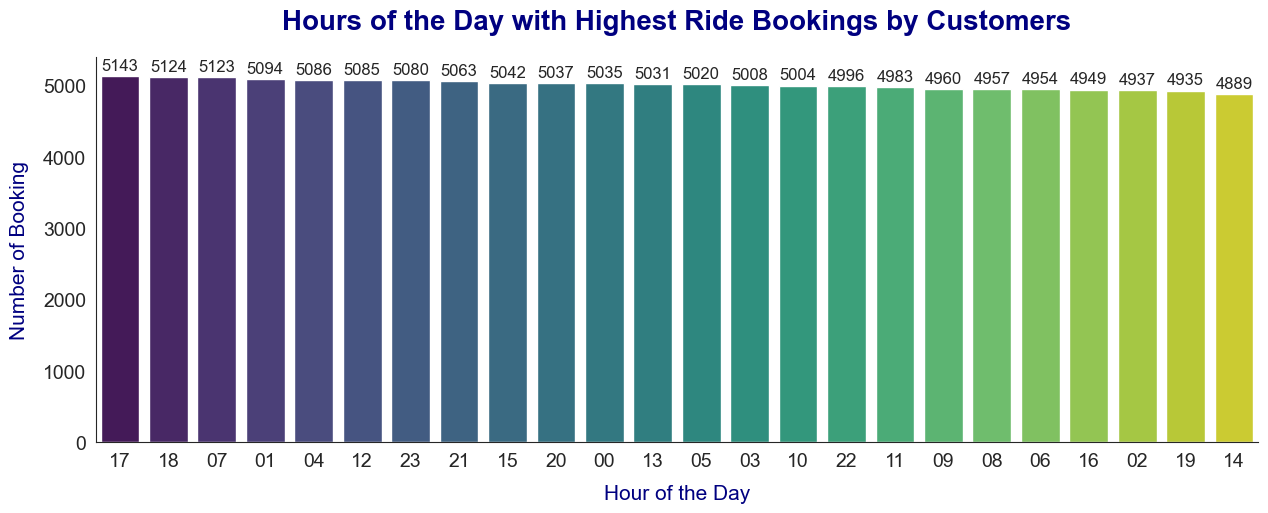

In [109]:
# Visulization of Hours of the day with highest ride booking by customers

booking_by_hour = df.groupby(['Hours'])['Booking ID'].count().sort_values(ascending = False).reset_index(name ='Count')

sns.set_style("white")

plt.figure(figsize=(15, 5))
ax = sns.barplot(x = 'Hours', y = 'Count', data = booking_by_hour, hue = 'Hours',palette ='viridis',legend = False)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, fontsize=12, padding=2)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

plt.title('Hours of the Day with Highest Ride Bookings by Customers',fontsize=20, fontweight='bold', color='navy', pad=20)
plt.xlabel('Hour of the Day',fontsize=15, color='navy',labelpad = 10)
plt.ylabel('Number of Booking',fontsize=15, color='navy',labelpad = 10)
plt.show()

In [110]:
# Change data type 

df['Hours'] = df['Hours'].astype('int64')

In [111]:
# Records in Peak hours

peak_hours = df[df['Hours'].between(17, 18)]
peak_hours

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6
16,2024-12-15 18:36:22,18:51,CNR5035470176,Success,CUST8901,Prime SUV,Location 39,Location 9,1.36,1.54,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,940.59,15.87,2.0,4.1,18,Sunday,Weekends,15
22,2024-10-20 18:36:22,17:11,CNR5607761878,Cancelled by Driver,CUST1825,Bike,Location 2,Location 44,0.00,0.00,0,Not Cancelled By Customer,1,Personal & Car related issues,0,Either Cancelled Or Success Ride,0.00,0.00,No Rating were Given,No Rating were Given,17,Sunday,Weekends,20
25,2024-11-09 18:36:22,18:31,CNR3932638970,Success,CUST7269,eBike,Location 35,Location 41,10.27,14.85,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,233.47,17.56,1.0,4.4,18,Saturday,Weekends,9
35,2024-09-24 18:36:22,18:43,CNR6309838137,Cancelled by Customer,CUST8239,eBike,Location 20,Location 25,0.00,0.00,1,Change of plans,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.00,0.00,No Rating were Given,No Rating were Given,18,Tuesday,Weekdays,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120486,2024-10-07 18:36:22,17:57,CNR2006925919,Success,CUST5134,Prime Sedan,Location 18,Location 30,4.85,7.67,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,132.06,13.12,3.7,2.6,17,Monday,Weekdays,7
120493,2025-01-12 18:36:22,17:40,CNR1414096628,Success,CUST9186,Prime Plus,Location 39,Location 32,1.14,6.14,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,621.69,7.97,2.1,1.3,17,Sunday,Weekends,12
120494,2024-12-25 18:36:22,17:14,CNR9004963236,Cancelled by Driver,CUST1864,Mini,Location 23,Location 10,0.00,0.00,0,Not Cancelled By Customer,1,More than permitted people in there,0,Either Cancelled Or Success Ride,0.00,0.00,No Rating were Given,No Rating were Given,17,Wednesday,Weekdays,25
120495,2024-11-18 18:36:22,18:59,CNR7659560167,Cancelled by Driver,CUST4571,Auto,Location 41,Location 28,0.00,0.00,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.00,0.00,No Rating were Given,No Rating were Given,18,Monday,Weekdays,18


In [112]:
# Most popular vehicle type during peak hours

df.groupby(['Vehicle Type'])['Booking ID'].count().sort_values(ascending = False)

Vehicle Type
Prime Plus     17317
Auto           17312
Mini           17298
Bike           17190
Prime SUV      17163
Prime Sedan    17128
eBike          17127
Name: Booking ID, dtype: int64

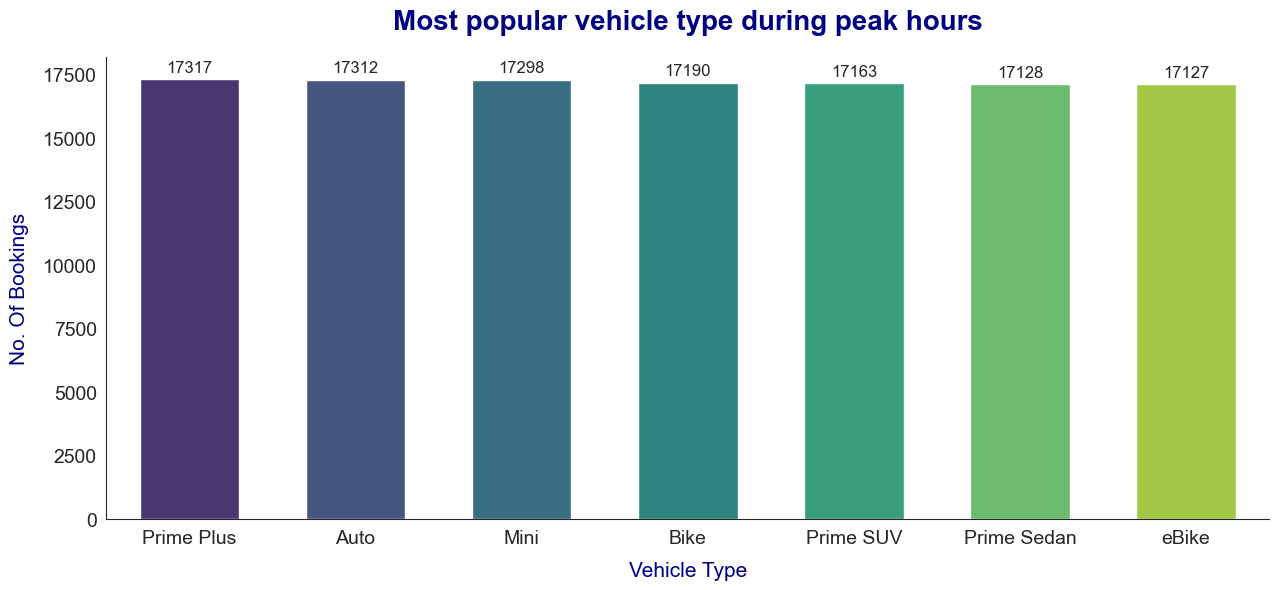

In [113]:
# Visulization of most popular vehicle type during peak hours

popular_vehicle = df.groupby(['Vehicle Type'])['Booking ID'].count().sort_values(ascending = False).reset_index(name = 'Count')

sns.set_style("white")

plt.figure(figsize = (15,6))
ax = sns.barplot( x = 'Vehicle Type', y = 'Count', data = popular_vehicle, hue = 'Vehicle Type', palette = 'viridis',legend= False, width = 0.6)

# Add labels to each bar

for container in ax.containers:
    ax.bar_label(container,fontsize = 12,padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

plt.title('Most popular vehicle type during peak hours',fontsize = 20,pad = 20,color= 'navy',fontweight='bold')
plt.xlabel('Vehicle Type',color='navy',fontsize=15, labelpad=10)
plt.ylabel('No. Of Bookings',color='navy',fontsize=15, labelpad=10)
plt.show()

In [114]:
# Findings

# Among all vehicle types, Prime Plus is the most preferred vehicle type during peak hours, closely followed by Auto. 
# This suggests that customers likely prefer premium services (Prime Plus) as well as cost-effective options (Auto) during busy times.

# Vehicle types such as Mini and Bike also have significant demand during peak hours, reflecting a balanced preference for mid-tier services 
# and quick/efficient modes of transportation

# Although they are premium options, Prime SUV and Prime Sedan have slightly lower demand compared to Prime Plus, indicating that customers may 
# prioritize affordability or speed over luxury during peak traffic hours.

# Despite being a relatively niche category, eBike has a demand similar to Prime Sedan, showing its appeal for eco-conscious or single-passenger riders.

## Question 16 : What is the average ride distance for each vehicle type?

In [115]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,4,Sunday,Weekends,10
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6


In [116]:
# Average ride distance for each vehicle type

df.groupby(['Vehicle Type'])['Ride Distance'].mean().sort_values(ascending = False)

Vehicle Type
Bike           9.652493
Auto           9.649874
Prime SUV      9.631994
Prime Sedan    9.618711
Prime Plus     9.605966
Mini           9.575760
eBike          9.465572
Name: Ride Distance, dtype: float64

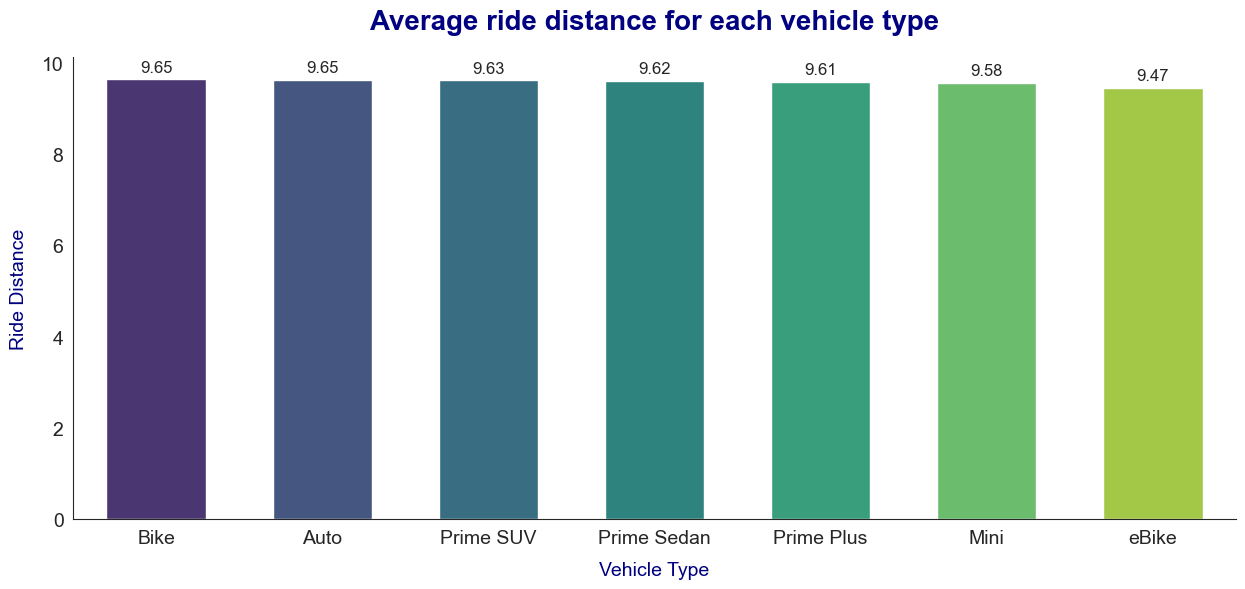

In [117]:
# Visulization of Average ride distance for each vehicle type

avg_fare = df.groupby(['Vehicle Type'])['Ride Distance'].mean().sort_values(ascending = False).sort_values(ascending = False).reset_index(name = 'Count')

sns.set_style("white")

plt.figure(figsize = (15,6))
ax = sns.barplot( x = 'Vehicle Type', y = 'Count', data = avg_fare, hue = 'Vehicle Type', palette = 'viridis',legend= False,width = 0.6)

# Add labels to each bar

for container in ax.containers:
    ax.bar_label(container,labels=[f'{val:.2f}' for val in container.datavalues], fontsize = 12,padding = 3)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

plt.title('Average ride distance for each vehicle type',fontsize = 20,pad = 20,color= 'navy',fontweight='bold')
plt.xlabel('Vehicle Type',color='navy',fontsize=14, labelpad=10)
plt.ylabel('Ride Distance',color='navy',fontsize=14, labelpad=10)
plt.show()

In [118]:
# Findings

# The average ride distances across all vehicle types fall within a very narrow range, from 9.47 km (eBike) to 9.65 km (Bike). 
# This indicates that the differences in ride distances between vehicle types are minimal.

# Bikes have the highest average ride distance (9.65 km), which could be due to their efficiency in navigating traffic and their appeal for
# relatively long yet affordable rides.

# eBikes have the lowest average ride distance (9.47 km). This might be because eBikes are typically preferred for shorter commutes or eco-friendly 
# travel within compact urban areas.

# Premium vehicles, such as Prime SUV (9.63 km), Prime Sedan (9.62 km), and Prime Plus (9.61 km), fall just below Bikes and Autos in terms of average 
# ride distance. This suggests that these vehicle types are used for moderately long trips but not significantly longer than non-premium options.
# Premium vehicles, such as Prime SUV (9.63 km), Prime Sedan (9.62 km), and Prime Plus (9.61 km), fall just below Bikes and Autos in terms of average 
# ride distance. This suggests that these vehicle types are used for moderately long trips but not significantly longer than non-premium options.

# The average ride distances are very similar across all vehicle types, indicating that ride distance is not strongly influenced by the choice of 
# vehicle type.

# Bikes and Autos are used for slightly longer trips on average, while eBikes are preferred for shorter commutes.

## Question 17 : Do customers with higher ratings tend to book premium vehicles?

In [119]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,4,Sunday,Weekends,10
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6


In [120]:
# Distinct Vehicle Type

df['Vehicle Type'].unique()

array(['Prime SUV', 'Prime Plus', 'Prime Sedan', 'Auto', 'eBike', 'Mini',
       'Bike'], dtype=object)

In [121]:
# Add new column vehicle category

df['Vehicle Category'] = df['Vehicle Type'].apply(lambda x : 'Premium' if x in ['Prime SUV', 'Prime Plus','Prime Sedan'] else 'Non_Premium')

In [122]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates,Vehicle Category
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,4,Sunday,Weekends,10,Premium
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6,Premium


In [123]:
# Records of customer ratings

temp_df = df[df['Customer Rating'] != 'No Rating were Given'].copy()
temp_df['Customer Rating'] = pd.to_numeric(temp_df['Customer Rating'],errors='coerce')

In [124]:
# customers with higher ratings and vehicles booked

temp_df.groupby(['Vehicle Category'])['Customer Rating'].mean().sort_values(ascending = False)

Vehicle Category
Non_Premium    3.005645
Premium        3.002213
Name: Customer Rating, dtype: float64

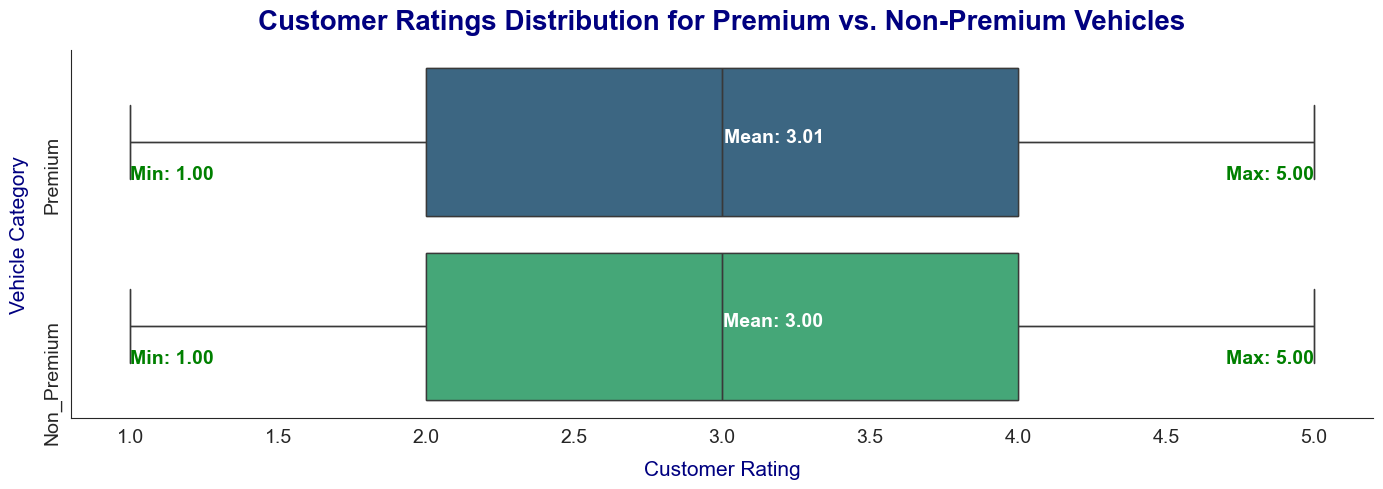

In [125]:
# visulization of customers with higher ratings and vehicles booked

high_rating = temp_df.groupby(['Vehicle Category'])['Customer Rating']

sns.set_style("white")

# plot boxplot
plt.figure(figsize = (15,5))
sns.boxplot(data = temp_df, x = 'Customer Rating', y = 'Vehicle Category', hue =  'Vehicle Category', palette = 'viridis')
ax = sns.boxplot(data = temp_df, x = 'Customer Rating', y = 'Vehicle Category', hue =  'Vehicle Category', palette = 'viridis')
# Calculate Statistic 
mean_val = high_rating.mean()
max_val = high_rating.max()
min_val = high_rating.min()


# Annotate the plot with statistics
for idx, category in enumerate(mean_val.index):
    # Mean
    plt.text(mean_val[category], idx, f"Mean: {mean_val[category]:.2f}", color='white', ha='left', fontsize=14, fontweight='bold' )
    # Max
    plt.text(max_val[category], idx + 0.2, f"Max: {max_val[category]:.2f}", color='green', ha='right', fontsize=14, fontweight='bold')
    # Min
    plt.text(min_val[category], idx + 0.2, f"Min: {min_val[category]:.2f}", color='green', ha='left', fontsize=14, fontweight='bold')

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=14) 

# add title and labels
plt.title('Customer Ratings Distribution for Premium vs. Non-Premium Vehicles',fontsize = 20,pad = 15,color= 'navy',fontweight='bold')
plt.xlabel('Customer Rating',color='navy',fontsize=15, labelpad=10)
plt.ylabel('Vehicle Category',color='navy',fontsize=15, labelpad=10)
plt.tight_layout()
plt.yticks (rotation = 90)


plt.show()

In [126]:
# Finding

# There is no significant difference in the mean ratings between customers booking Premium and Non-Premium vehicles, with only a 0.01 difference 
# in the average ratings.

# Both categories have the same minimum and maximum ratings, meaning customers who book either type of vehicle can give the full range of ratings (1-5).

# The fact that the mean ratings for both vehicle categories are so close suggests that customers ratings for both Premium and Non-Premium vehicles
# are similarly distributed. This could mean that, in general, the experience of both vehicle categories is perceived almost equally by the customers.
                                                                                                       
# Since the mean ratings for Premium vehicles are slightly higher (3.01 compared to 3.00), it could indicate that customers who book Premium vehicles, 
# on average, might have slightly more favorable views, but the difference is minimal and not strong enough to suggest a clear trend.

# In conclusion, the data suggests that there is no strong preference or trend towards premium vehicles among customers with higher ratings based 
# on the given rating range.

## Question 18 : Ride demand based on time of day (morning, afternoon, evening, night)?

In [127]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates,Vehicle Category
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,4,Sunday,Weekends,10,Premium
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6,Premium


In [128]:
df['Hours'].unique()

array([ 4, 18,  1,  6, 11, 19, 22,  7,  2,  0, 12,  9, 21,  8, 17, 14, 13,
        5, 16,  3, 10, 20, 23, 15], dtype=int64)

In [129]:
# Changing data type of hour column

df['Hours'] = df['Hours'].astype('int64')

In [130]:
# Add Column shifts

# Define conditions for the time periods
conditions = [
    (df['Hours'] >= 5) & (df['Hours'] < 12),  # Morning
    (df['Hours'] >= 12) & (df['Hours'] < 17),  # Afternoon
    (df['Hours'] >= 17) & (df['Hours'] < 21),  # Evening
    (df['Hours'] >= 21) | (df['Hours'] < 5)    # Night
]

# Define corresponding labels for each condition
choices = ['Morning', 'Afternoon', 'Evening', 'Night']

# Use np.select to assign the time periods
df['Shifts'] = np.select(conditions, choices)


In [131]:
# Ride demand based on time of day (morning, afternoon, evening, night)

ride_demand = df.groupby(['Shifts'])['Booking ID'].count().sort_values(ascending = False)
ride_demand

Shifts
Night        40299
Morning      35001
Afternoon    24996
Evening      20239
Name: Booking ID, dtype: int64

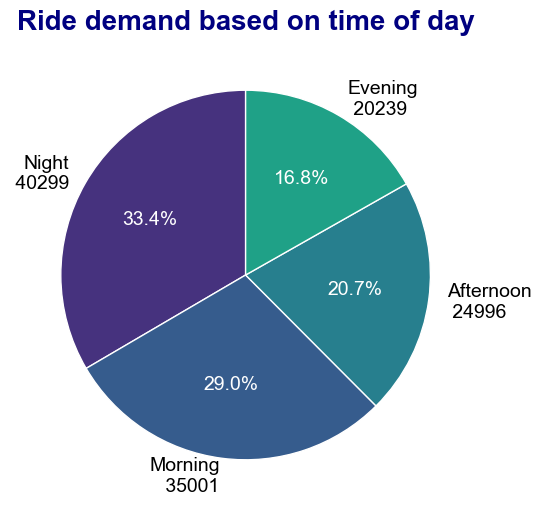

In [132]:
# Visulization of ride demand based on time of day (morning, afternoon, evening, night)

ride_demand = df.groupby(['Shifts'])['Booking ID'].count().sort_values(ascending = False)


# define Seaborn color palette to use 
palette_color = sns.color_palette('viridis') 

plt.figure(figsize = (15,6))
sns.set_style("darkgrid")
wedges, texts, autotexts = plt.pie(ride_demand, 
        labels=[f"{label}\n {count}" for label, count in zip(ride_demand.index, ride_demand.values)], 
        colors = palette_color ,
        autopct='%1.1f%%',  # Display percentages
        startangle=90,      # Start angle for better orientation 
        textprops={'color': 'white'},  # Set percentage text color to white
        center=(0, 0) 
)

# Customize label text color (numbers + labels)
for text in texts:
    text.set_color('black')
    text.set_fontsize(14)

# Customize autotext (percentage text) font size
for autotext in autotexts:
    autotext.set_fontsize(14) 

# Title of the chart
plt.title('Ride demand based on time of day',fontsize = 20,pad = 10,color= 'navy',fontweight='bold')
plt.show()

In [133]:
# Findings 

# The Night shift (40,299 rides) has the highest demand. This suggests that a significant portion of customers prefer to book rides 
# during the late-night hours, possibly indicating a need for transportation in the city during off-peak hours, for example, for late-night work shifts, 
# social outings, or airport rides.

# The Morning shift (35,001 rides) also has a high number of rides. This could be due to morning commuters heading to work, school, or other early 
# activities. Morning demand is typically high for regular work routines.

# The Afternoon shift (24,996 rides) sees a drop in demand compared to the morning. This may reflect fewer people traveling during mid-day, either due 
# to work-related schedules or other daytime activities that require less transportation.

# The Evening shift (20,239 rides) has the lowest demand of all the time periods. Evening demand could be affected by factors such as people being at 
# home after work, having fewer errands to run, or possibly fewer events taking place compared to night-time.

# Night and Morning shifts dominate the demand for rides, with Night leading slightly. 
# This could be due to nighttime activities and the early morning work commute.

## Question 19 : What is the average ride distance for successful rides?

In [134]:
# Analyzing data 

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates,Vehicle Category,Shifts
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,4,Sunday,Weekends,10,Premium,Night
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6,Premium,Evening


In [135]:
# Records of successful rides

df[df['Booking Status'] == 'Success']

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates,Vehicle Category,Shifts
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,4,Sunday,Weekends,10,Premium,Night
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6,Premium,Evening
3,2024-08-01 18:36:22,06:35,CNR3707797042,Success,CUST9369,Prime SUV,Location 28,Location 8,3.16,7.84,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,185.91,17.11,1.8,4.9,6,Thursday,Weekdays,1,Premium,Morning
4,2024-12-20 18:36:22,11:59,CNR6385277914,Success,CUST3359,Prime Sedan,Location 3,Location 15,14.83,13.58,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,171.60,7.31,1.2,1.4,11,Friday,Weekdays,20,Premium,Morning
5,2024-12-16 18:36:22,19:51,CNR3135727066,Success,CUST8772,Auto,Location 4,Location 18,13.70,2.78,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,833.77,18.87,2.6,2.7,19,Monday,Weekdays,16,Non_Premium,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121193,2024-09-13 18:36:22,11:57,CNR3423991890,Success,CUST7976,Mini,Location 39,Location 27,10.56,7.10,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,844.85,2.17,2.1,2.8,11,Friday,Weekdays,13,Non_Premium,Morning
121399,2024-10-02 18:36:22,03:30,CNR3119275864,Success,CUST3009,Prime Sedan,Location 28,Location 33,13.10,13.66,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,233.98,0.00,3.9,1.5,3,Wednesday,Weekdays,2,Premium,Night
121439,2024-12-13 18:36:22,04:02,INVALID7278,Success,CUST1453,eBike,Location 44,Location 5,14.27,11.16,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.00,21.60,2.7,1.7,4,Friday,Weekdays,13,Non_Premium,Night
121512,2024-09-11 18:36:22,08:27,CNR8116949904,Success,CUST6973,Prime Plus,Location 32,Location 20,6.10,6.91,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,600.99,16.98,4.5,5.0,8,Wednesday,Weekdays,11,Premium,Morning


In [136]:
# Average ride distance for successful rides in kilometers

flt_distance = df['Ride Distance'] != 0
avg_ride_distance = df[(df['Booking Status'] == 'Success') & flt_distance]['Ride Distance'].mean()
avg_ride_distance

15.511227061299447

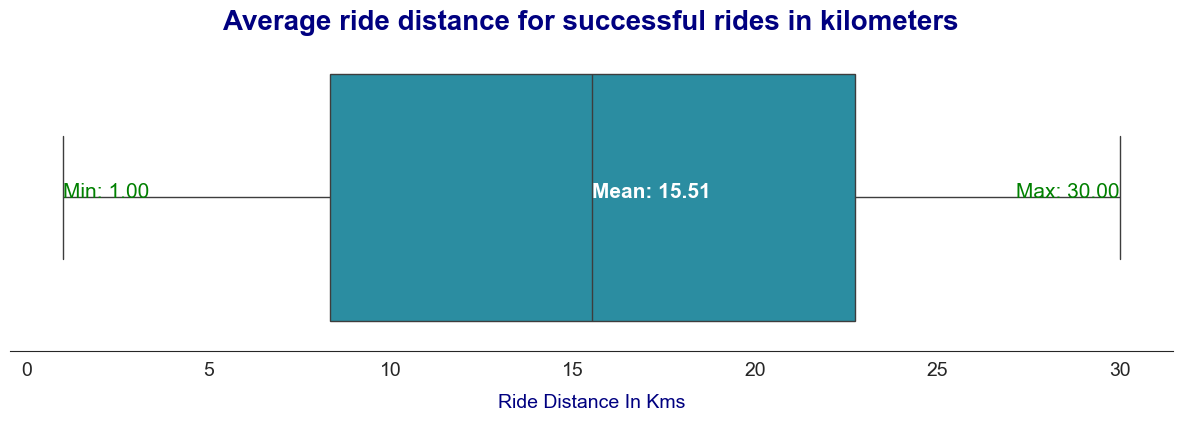

In [137]:
# Visulization of average ride distance for successful rides in kilometers

flt_distance = df['Ride Distance'] != 0
avg_ride_distance = df[(df['Booking Status'] == 'Success') & flt_distance]['Ride Distance']

sns.set_style("white")

plt.figure(figsize = (15,4))
ax = sns.boxplot( x = avg_ride_distance, color = '#189ab4')

# Calculate statistics
mean_val = avg_ride_distance.mean()
max_val = avg_ride_distance.max()
min_val = avg_ride_distance.min()

# Annotate the plot with statistics
plt.text(y=0, x=mean_val, s=f"Mean: {mean_val:.2f}", color ='white', ha ='left', fontsize = 15,fontweight='bold')
plt.text(y=0, x=max_val, s=f"Max: {max_val:.2f}", color='green', ha='right', fontsize=15)
plt.text(y=0, x=min_val, s=f"Min: {min_val:.2f}", color='green', ha='left', fontsize=15)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=10)  

plt.title('Average ride distance for successful rides in kilometers', fontsize = 20,pad = 10,color= 'navy',fontweight='bold')
plt.xlabel('Ride Distance In Kms',color='navy',fontsize=14, labelpad=10)
plt.show()


In [138]:
# Findings

# Mean Ride Distance: The average ride distance is 15.51 kilometers, indicating that most successful rides tend to be medium-length journeys.

# The shortest ride distance is 1 kilometer (Min).
# The longest ride distance is 30 kilometers (Max).

# The ride distances are relatively well-distributed within the range, as the boxplot does not show extreme outliers.

# This suggests that ride-sharing services are often used for both short and moderate distances, with fewer rides exceeding 30 kilometers.

## Question 20 : What is the average fare for successful rides across different vehicle types?

In [139]:
# Analyzing data

df.head(2)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates,Vehicle Category,Shifts
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,4,Sunday,Weekends,10,Premium,Night
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6,Premium,Evening


In [140]:
# Distinct Vehicle Types

df['Vehicle Type'].unique()

array(['Prime SUV', 'Prime Plus', 'Prime Sedan', 'Auto', 'eBike', 'Mini',
       'Bike'], dtype=object)

In [141]:
# Successful rides

df[df['Booking Status'] == 'Success']

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates,Vehicle Category,Shifts
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,4,Sunday,Weekends,10,Premium,Night
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6,Premium,Evening
3,2024-08-01 18:36:22,06:35,CNR3707797042,Success,CUST9369,Prime SUV,Location 28,Location 8,3.16,7.84,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,185.91,17.11,1.8,4.9,6,Thursday,Weekdays,1,Premium,Morning
4,2024-12-20 18:36:22,11:59,CNR6385277914,Success,CUST3359,Prime Sedan,Location 3,Location 15,14.83,13.58,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,171.60,7.31,1.2,1.4,11,Friday,Weekdays,20,Premium,Morning
5,2024-12-16 18:36:22,19:51,CNR3135727066,Success,CUST8772,Auto,Location 4,Location 18,13.70,2.78,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,833.77,18.87,2.6,2.7,19,Monday,Weekdays,16,Non_Premium,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121193,2024-09-13 18:36:22,11:57,CNR3423991890,Success,CUST7976,Mini,Location 39,Location 27,10.56,7.10,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,844.85,2.17,2.1,2.8,11,Friday,Weekdays,13,Non_Premium,Morning
121399,2024-10-02 18:36:22,03:30,CNR3119275864,Success,CUST3009,Prime Sedan,Location 28,Location 33,13.10,13.66,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,233.98,0.00,3.9,1.5,3,Wednesday,Weekdays,2,Premium,Night
121439,2024-12-13 18:36:22,04:02,INVALID7278,Success,CUST1453,eBike,Location 44,Location 5,14.27,11.16,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,0.00,21.60,2.7,1.7,4,Friday,Weekdays,13,Non_Premium,Night
121512,2024-09-11 18:36:22,08:27,CNR8116949904,Success,CUST6973,Prime Plus,Location 32,Location 20,6.10,6.91,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,600.99,16.98,4.5,5.0,8,Wednesday,Weekdays,11,Premium,Morning


In [142]:
# Average fare for successful rides across different vehicle types

df[df['Booking Status'] == 'Success'].groupby(df['Vehicle Type'])['Booking Value'].mean().sort_values(ascending = False)

Vehicle Type
Prime SUV      434.423713
Prime Sedan    432.691585
Prime Plus     432.458791
Bike           429.259858
Auto           429.188245
Mini           429.165323
eBike          428.697366
Name: Booking Value, dtype: float64

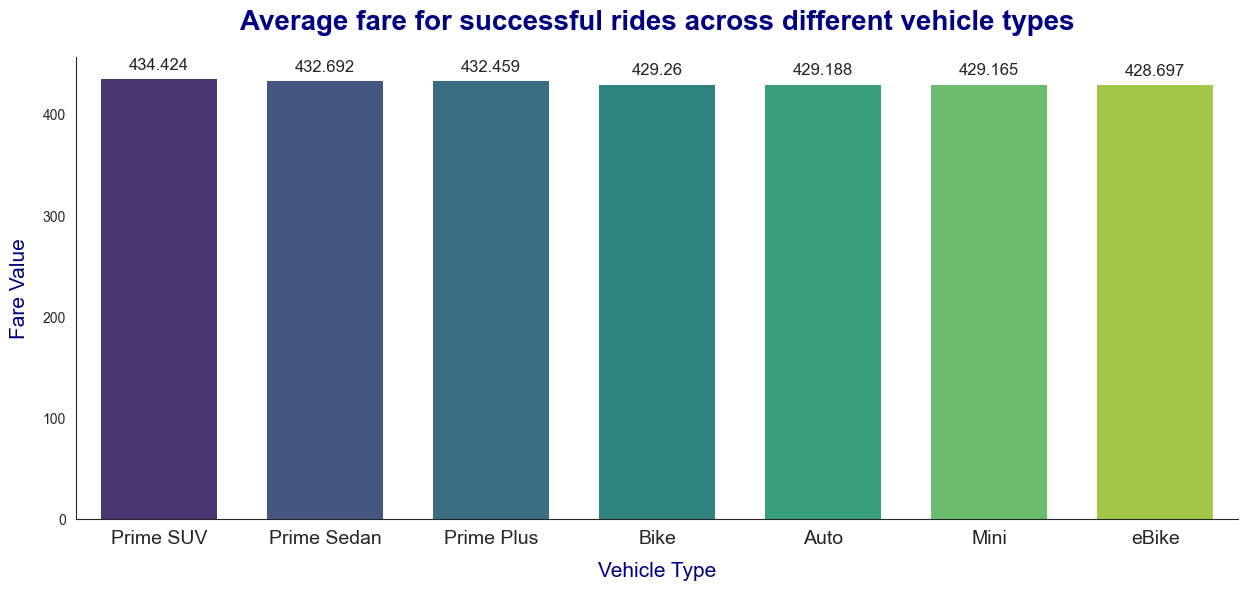

In [143]:
# Visulization of Average fare for successful rides across different vehicle types

avg_fare = df[df['Booking Status'] == 'Success'].groupby(df['Vehicle Type'])['Booking Value'].mean().sort_values(ascending = False).reset_index(name = 'Count')

sns.set_style("white")

plt.figure(figsize = (15,6))
ax = sns.barplot( x = 'Vehicle Type', y = 'Count', data = avg_fare, hue = 'Vehicle Type', palette = 'viridis',legend= False, edgecolor='none',width = 0.7)

# Customize spines to show only the bottom and left axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

# Increase font size of x-axis values
ax.tick_params(axis='x', labelsize=14)  
ax.tick_params(axis='y', labelsize=10)  

# Add labels to each bar

for container in ax.containers:
    ax.bar_label(container, fontsize = 12,padding = 5)

plt.title('Average fare for successful rides across different vehicle types',fontsize = 20,pad = 20,color= 'navy',fontweight='bold')
plt.xlabel('Vehicle Type',color='navy',fontsize=15, labelpad=10)
plt.ylabel('Fare Value',color='navy',fontsize=15, labelpad=10)
plt.show()

In [144]:
# Findings

# The Prime SUV has the highest average fare at 434.42 units, which suggests that it is likely a premium service with higher pricing 
# due to factors like larger vehicle size, comfort, or additional features.

# Prime Sedan and Prime Plus have average fares very close to each other (432.69 and 432.46 units, respectively). 
# This indicates that these vehicle types are similarly priced, likely targeting the same customer segment that values comfort and reliability.

# Bike, Auto, and Mini are in the lower fare range, around 429.18–429.26 units. 
# These vehicles are typically more economical options and cater to customers looking for affordable and convenient rides over luxury.

# eBike has the lowest average fare at 428.69 units. 
# This could be due to its smaller size, lower operational costs, or a focus on short-distance travel, making it the most economical option.

In [147]:
# Dataset to be exported

df.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Reason for cancelling by Customer,Cancelled Rides by Driver,Reason for cancelling by Driver,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Hours,Day_Name,Day Category,Dates,Vehicle Category,Shifts
0,2024-11-10 18:36:22,04:10,CNR6642912620,Success,CUST4413,Prime SUV,Location 26,Location 10,6.02,14.37,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,362.18,15.30,2.3,4.3,4,Sunday,Weekends,10,Premium,Night
1,2024-12-06 18:36:22,18:34,CNR1054600059,Success,CUST2253,Prime Plus,Location 14,Location 48,4.74,2.32,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,87.38,20.06,3.7,1.0,18,Friday,Weekdays,6,Premium,Evening
2,2024-09-25 18:36:22,01:00,CNR7109492260,Cancelled by Driver,CUST9431,Prime Sedan,Location 10,Location 12,0.00,0.00,0,Not Cancelled By Customer,1,The customer was coughing/sick,0,Either Cancelled Or Success Ride,0.00,0.00,No Rating were Given,No Rating were Given,1,Wednesday,Weekdays,25,Premium,Night
3,2024-08-01 18:36:22,06:35,CNR3707797042,Success,CUST9369,Prime SUV,Location 28,Location 8,3.16,7.84,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,185.91,17.11,1.8,4.9,6,Thursday,Weekdays,1,Premium,Morning
4,2024-12-20 18:36:22,11:59,CNR6385277914,Success,CUST3359,Prime Sedan,Location 3,Location 15,14.83,13.58,0,Not Cancelled By Customer,0,Not Cancelled By Driver,0,Either Cancelled Or Success Ride,171.60,7.31,1.2,1.4,11,Friday,Weekdays,20,Premium,Morning


In [150]:
# Export csv file 

df.to_csv(r'C:\Users\disha\Downloads\All Projects\End To End Projects\Ola Project\cleaned_dataset.csv',index = False)